# Factory Machine Failure Classification

Name: Soh Hong Yu<br/><br/>
Admin Number: P2100775<br/><br/>
Class: DAAA/FT/2A/01<br/><br/>
Module Code: ST1511 AI and Machine Learning<br/>

<hr>
<h3>References (In Harvard format):</h3>
<ol>
  <li>Westrom, D., 2021. Top Causes of Machine Failure and How to Prevent Them. [online] Machinemetrics.com. <br/>Available at: <<a href="https://www.machinemetrics.com/blog/machine-failure">https://www.machinemetrics.com/blog/machine-failure</a>> [Accessed 18 May 2022].</li>
  <li>KPMG Advanced Analytics Big Data team, 2020. [online] Buildmedia.readthedocs.org. <br/>Available at: <<a href="https://buildmedia.readthedocs.org/media/pdf/phik/latest/phik.pdf">https://buildmedia.readthedocs.org/media/pdf/phik/latest/phik.pdf</a>> [Accessed 19 May 2022].
  </li>
  <li>Fluke.com. 2022. 13 common causes of motor failure. [online] <br/>Available at: <<a href="https://www.fluke.com/en-sg/learn/blog/motors-drives-pumps-compressors/13-causes-motor-failure">https://www.fluke.com/en-sg/learn/blog/motors-drives-pumps-compressors/13-causes-motor-failure</a>> [Accessed 20 May 2022].</li>
  <li>
  Power Test, Inc. 2022. How to Calculate Horsepower - Power Test, Inc.. [online] <br/>Available at: <<a href="https://powertestdyno.com/how-to-calculate-horsepower/">https://powertestdyno.com/how-to-calculate-horsepower/</a>> [Accessed 20 May 2022].</li>
  <li>neptune.ai. 2022. Balanced Accuracy: When Should You Use It? - neptune.ai. [online] <br/>Available at: <<a href="https://neptune.ai/blog/balanced-accuracy">https://neptune.ai/blog/balanced-accuracy</a>> [Accessed 21 May 2022].</li>
</ol>


# Project Objective

Use a supervised classification machine learning model to predict if a machine will fail or not


# Background Information

Dataset is collected from a factory. Inside the factory, there are many machines, and they might break down after using for some time. Therefore, it is useful to build a prediction model in order to predict which machine will possibly fail before it actually fails, so that the technician can replace it without interruption the production.

### Potential Reasons why Machine fails

<ul>
<li>Tool wear failure: Machines experiencing physical wear and tear like bearing failure</li>
<li>Overheating: Machines overheat and causes circuits in the machine to get damaged</li>
<li>Shaft looseness: Machines with high horsepower will cause the machine to overwork and failure</li>
</ul>


# Initialising Libraries and Variables


In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns

# SKLEARN Libraries
# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

# Model Selection
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_predict,
    learning_curve,
    StratifiedKFold,
)
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

# Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier

# IMBLEARN
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Pickle Library = Saving Models
import pickle


In [2]:
# This is used to set the seed for the RNG splitter later on.
random_state = 32


# Loading Datasets


In [3]:
df = pd.read_csv("./factory_data (classification).csv", sep=",")
df.head()


,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0


# Exploratory Data Analysis

We will begin by conducting an exploratory data analysis of the data, to gain a better understanding of the characteristics of the dataset.


This is a dataset collected from a manufacturing company, it contains 20000 data points with 9 columns.

**Unique ID:** Unique identifier ranging from 1 to 20000<br/>
**Product ID:** The serial number of product<br/>
**Quality:** Consist of letter L, M and H for low, medium and high quality<br/>
**Ambient T:** Environment temperature<br/>
**Process T:** Machine temperature<br/>
**Rotation Speed:** Rotational speed of machine when running<br/>
**Torque:** Measure of the turning force<br/>
**Tool Wear:** Tool wear time estimated for the machine<br/>
**Machine Status:** Labels indicate machine failure or not, 1 means failure, 0 means normal.


## Data Exploration

To prevent mutation of our original data, we will make a copy of our data to perform eda on it.


In [4]:
df_eda = df.copy()


### Descriptive Statistics


In [5]:
df_eda.shape


(20000, 9)

There are 20000 rows and 9 columns in the entire data set.


In [6]:
df_eda.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             20000 non-null  int64  
 1   Product ID            20000 non-null  object 
 2   Quality               19009 non-null  object 
 3   Ambient T (C)         20000 non-null  float64
 4   Process T (C)         19600 non-null  float64
 5   Rotation Speed (rpm)  18812 non-null  float64
 6   Torque (Nm)           20000 non-null  float64
 7   Tool Wear (min)       20000 non-null  int64  
 8   Machine Status        20000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


<u><b>Observations</b></u>

<ul>
  <li>The shape of dataset is (20000, 9) whereby there is 20000 observations and 9 columns. (8 Features + 1 Target Variable: "Machine Status")</li>
  <li>Datatype of all columns are numeric except Product ID and Quality</li>
  <li>Missing values is observed in "Quality", "Process T (C)" and "Rotation Speed (rpm)" columns which is around 4.955%, 2% and 5.94% (991, 400 and 1188 Missing Values respectively) of the entire dataset.</li>
</ul>

We note that the columns "Quality", "Process T (C)", "Rotation Speed (rpm)" has missing values. We will need to handle this later



#### Target Variable


In [7]:
df_eda["Machine Status"].unique()


array([0, 1], dtype=int64)

We also have to note that machine status is a numerical value that is either 1 or 0. <br/>
0: Machine working <br/>
1: Machine fail

We can convert the values into a string for us to easily view for our future eda using the .replace() so that<br/>
Working: Machine working<br/>
Fail: Machine fail


In [8]:
df_eda["Machine Status"] = (
    df_eda["Machine Status"].replace(0, "Working").replace(1, "Fail")
)



### Data Information

In [9]:
descriptive_stats = df_eda.describe(include="all").T
descriptive_stats["Proportion of Most Frequent Value"] = (
    descriptive_stats["freq"] / len(df_eda) * 100
)
descriptive_stats.sort_values("Proportion of Most Frequent Value", ascending=False)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Proportion of Most Frequent Value
Machine Status,20000,2,Working,19322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.61
Quality,19009,3,L,11390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.95
Product ID,20000,19408,T21950,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015
Unique ID,20000.0,NaN,NaN,NaN,10000.5,5773.647028,1.0,5000.75,10000.5,15000.25,20000.0,NaN
Ambient T (C),20000.0,NaN,NaN,NaN,26.90493,2.000834,22.15,25.25,26.95,28.45,31.45,NaN
Process T (C),19600.0,NaN,NaN,NaN,36.904291,1.483647,32.55,35.75,36.95,37.95,40.75,NaN
Rotation Speed (rpm),18812.0,NaN,NaN,NaN,1538.795397,178.674963,1168.0,1423.0,1503.0,1613.0,2886.0,NaN
Torque (Nm),20000.0,NaN,NaN,NaN,39.98691,9.968684,3.8,33.2,40.1,46.8,76.6,NaN
Tool Wear (min),20000.0,NaN,NaN,NaN,107.951,63.652555,0.0,53.0,108.0,162.0,253.0,NaN


From looking at the most frequent value of each column, we note that:

- almost all the machines are working, and the machine status does not appear to be balanced.


#### Target Label

Our target label is the Machine Status column. It is a binary column with two values:

False: Machine working<br/>
True: Machine fail


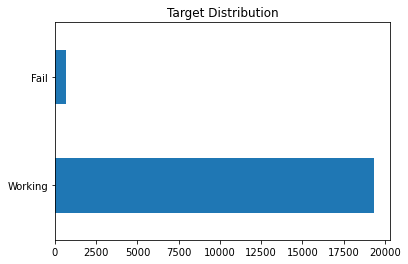

In [10]:
ax = (
    df_eda["Machine Status"]
    .value_counts()
    .plot(kind="barh", title="Target Distribution")
)



As we can see, the machine status distribution is imbalanced, with almost all machines working. This is a concern and we will have to take note of this.


### Pandas-Profiling

Pandas-Profiling is a convenient tool to quickly explore the datasets along with some alerts/warnings about the dataset.


In [11]:
prof = ProfileReport(df_eda, explorative=True)
# prof.to_notebook_iframe()
# prof.to_file(output_file='factory_analysis.html')


In [71]:
# Summary 1
print("Summary")
print(
    f"1. Number of UniqueID: {len(np.unique(df_eda['Unique ID']))}, Length of Dataset: {len(df_eda)}")
print(
    f"2. Number of ProductID: {len(np.unique(df_eda['Product ID']))}")
print(
    f"3. Missing Values: \n{df_eda.isna().sum()}")
print(
    f"4. Unique Values in Quality Column: {df_eda['Quality'].unique()}")
print(
    f"5. Number of zeros in Tool Wear (min): {(df_eda['Tool Wear (min)'] == 0).sum()}\nPercentage of dataset: {(df_eda['Tool Wear (min)'] == 0).sum()/len(df_eda) * 100}%")


Summary
1. Number of UniqueID: 20000, Length of Dataset: 20000
2. Number of ProductID: 19408
3. Missing Values: 
Unique ID                  0
Product ID                 0
Quality                  991
Ambient T (C)              0
Process T (C)            400
Rotation Speed (rpm)    1188
Torque (Nm)                0
Tool Wear (min)            0
Machine Status             0
dtype: int64
4. Unique Values in Quality Column: ['M' 'L' nan 'H']
5. Number of zeros in Tool Wear (min): 240
Percentage of dataset: 1.2%


<b>Summary:</b>

<ol>
  <li>Unique ID is a UNIQUE KEY which means it is not a feature to describe the machine functions</li>
  <li>Product ID has a high cardinality: 19408 distinct values this means it is a primary key and it is not a feature to describe the machine properly</li>
  <li>Data Cleaning/ Imputation is needed to treat missing values for Quality, Process T (C), Rotation Speed (rpm).</li>
  <li>Encode the Quality features into Ordinal Encoding as Quality is a ordinal value ['L','M','H'].</li>
  <li>Tool Wear (min) has 240 zeros which is 1.2% of the entire dataset. </li>
</ol>


### Univariate Analysis

We will begin with a univariate analysis, analysing the distribution of each variable.


#### Distributions

We will plot and see the distribution of the different variables and how it relates to Machine Status


##### Ambient T (C)

Distribution of Ambient T is not very obvious. But it seems like if the temperature of Ambient is larger than 28, the machine will generally fail


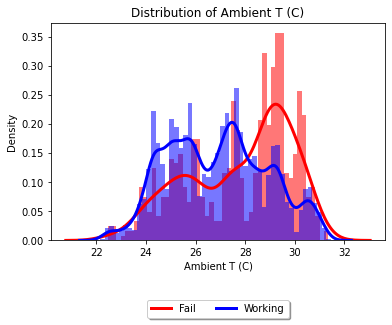

In [72]:
# Ambient T (C)
plt.hist(
    df[df["Machine Status"] == 1]["Ambient T (C)"],
    density=True,
    bins=50,
    color="#ff000088",
)
plt.hist(
    df[df["Machine Status"] == 0]["Ambient T (C)"],
    density=True,
    bins=50,
    color="#0000ff88",
)
sns.kdeplot(df[df["Machine Status"] == 1]["Ambient T (C)"], lw=3, color="#ff0000")
sns.kdeplot(df[df["Machine Status"] == 0]["Ambient T (C)"], lw=3, color="#0000ff")
plt.legend(
    np.unique(df_eda["Machine Status"]),
    loc="upper center",
    bbox_to_anchor=(0.5, -0.25),
    fancybox=True,
    shadow=True,
    ncol=3,
)
plt.title("Distribution of Ambient T (C)")
plt.show()


##### Process T (C)

Distribution of Process T is not very obvious and the distribution is hard to distinguish between the machine working or failing


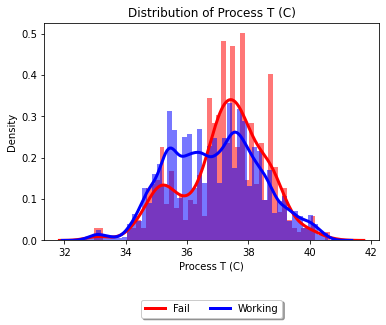

In [73]:
# Process T (C)
plt.hist(
    df[df["Machine Status"] == 1]["Process T (C)"],
    density=True,
    bins=50,
    color="#ff000088",
)
plt.hist(
    df[df["Machine Status"] == 0]["Process T (C)"],
    density=True,
    bins=50,
    color="#0000ff88",
)
sns.kdeplot(df[df["Machine Status"] == 1]["Process T (C)"], lw=3, color="#ff0000")
sns.kdeplot(df[df["Machine Status"] == 0]["Process T (C)"], lw=3, color="#0000ff")
plt.legend(
    np.unique(df_eda["Machine Status"]),
    loc="upper center",
    bbox_to_anchor=(0.5, -0.25),
    fancybox=True,
    shadow=True,
    ncol=3,
)
plt.title("Distribution of Process T (C)")
plt.show()


##### Rotation Speed (rpm)

Distribution of Rotation Speed (rpm) very skewed to the right. But generally, the lower the rpm, the more likely the machine is to fail


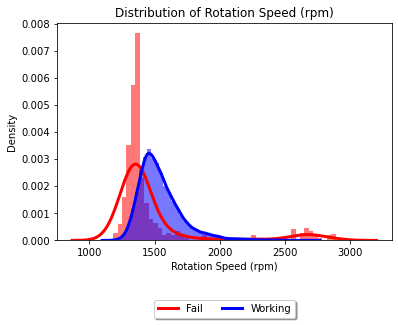

In [75]:
# Rotation Speed (rpm)
plt.hist(
    df[df["Machine Status"] == 1]["Rotation Speed (rpm)"],
    density=True,
    bins=50,
    color="#ff000088",
)
plt.hist(
    df[df["Machine Status"] == 0]["Rotation Speed (rpm)"],
    density=True,
    bins=50,
    color="#0000ff88",
)
sns.kdeplot(
    df[df["Machine Status"] == 1]["Rotation Speed (rpm)"], lw=3, color="#ff0000"
)
sns.kdeplot(
    df[df["Machine Status"] == 0]["Rotation Speed (rpm)"], lw=3, color="#0000ff"
)
plt.legend(
    np.unique(df_eda["Machine Status"]),
    loc="upper center",
    bbox_to_anchor=(0.5, -0.25),
    fancybox=True,
    shadow=True,
    ncol=3,
)
plt.title("Distribution of Rotation Speed (rpm)")
plt.show()


##### Torque (Nm)

Distribution of Torque (Nm) for machine working is normally distributed while the distribution of machine working has a bimodal distribution at around 10 and 50


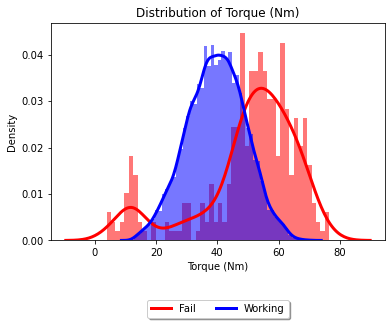

In [76]:
# Torque (Nm)
plt.hist(
    df[df["Machine Status"] == 1]["Torque (Nm)"],
    density=True,
    bins=50,
    color="#ff000088",
)
plt.hist(
    df[df["Machine Status"] == 0]["Torque (Nm)"],
    density=True,
    bins=50,
    color="#0000ff88",
)
sns.kdeplot(df[df["Machine Status"] == 1]["Torque (Nm)"], lw=3, color="#ff0000")
sns.kdeplot(df[df["Machine Status"] == 0]["Torque (Nm)"], lw=3, color="#0000ff")
plt.legend(
    np.unique(df_eda["Machine Status"]),
    loc="upper center",
    bbox_to_anchor=(0.5, -0.25),
    fancybox=True,
    shadow=True,
    ncol=3,
)
plt.title("Distribution of Torque (Nm)")
plt.show()


##### Tool Wear (min)

Distribution of Tool Wear (min) for working machine is relatively normal but the distribution of Tool Wear (min) for machine failure is left skewed


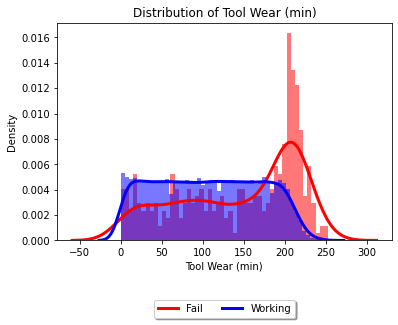

In [77]:
# Tool Wear (min)
plt.hist(
    df[df["Machine Status"] == 1]["Tool Wear (min)"],
    density=True,
    bins=50,
    color="#ff000088",
)
plt.hist(
    df[df["Machine Status"] == 0]["Tool Wear (min)"],
    density=True,
    bins=50,
    color="#0000ff88",
)
sns.kdeplot(df[df["Machine Status"] == 1]["Tool Wear (min)"], lw=3, color="#ff0000")
sns.kdeplot(df[df["Machine Status"] == 0]["Tool Wear (min)"], lw=3, color="#0000ff")
plt.legend(
    np.unique(df_eda["Machine Status"]),
    loc="upper center",
    bbox_to_anchor=(0.5, -0.25),
    fancybox=True,
    shadow=True,
    ncol=3,
)
plt.title("Distribution of Tool Wear (min)")
plt.show()


### Bivariate Analysis

We will analysis the relationships between the different variables


#### Pairplot

Since our feature space is not extremely large, we can afford to plot out a Pairplot to visualise the distribution of data points with relation to Target variable Machine Status

Is there a noticable pattern relating Machine Status with Quantitave variables like Ambient T and Process T
List item


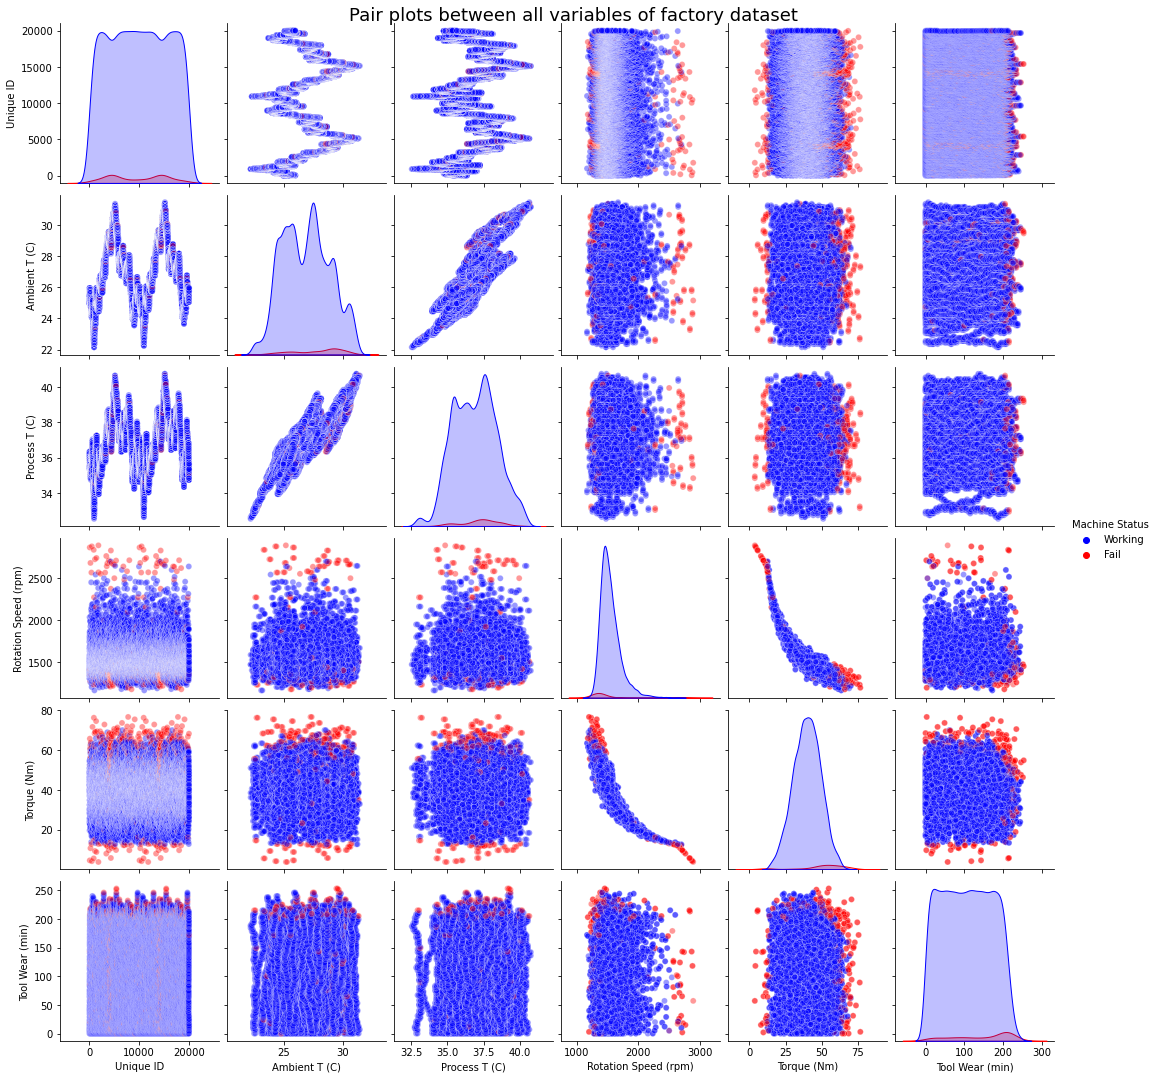

In [18]:
g = sns.pairplot(
    df_eda.drop(columns=["Product ID"]),
    hue="Machine Status",
    palette=["b", "r"],
    plot_kws=dict(alpha=0.4),
)
g.fig.suptitle("Pair plots between all variables of factory dataset", y=1.001, fontsize=18)
plt.show()


**Observations**

- For Rotation Speed (rpm) and Torque (Nm), there is a general downward trend
- For Ambient T (C) and Process T (C), there is a general upward trend
- There is no clear trend for other variables


#### Pearson's r Correlations

To check for correlation between the features and target, we will make use Pearson's r correlation coefficient. The Pearson's r correlation is able to measure the linear correlation between the two variables. Furthermore, r is invariant under separate changes in location and scale of the two variables, implying that for a linear function the angle to the x-axis does not affect r.

To calculate r for two variables X and Y, one divides the covariance of X and Y by the product of their standard deviations.

Formula:
\begin{equation}
\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}
\end{equation}

\begin{equation}
r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}
\end{equation}


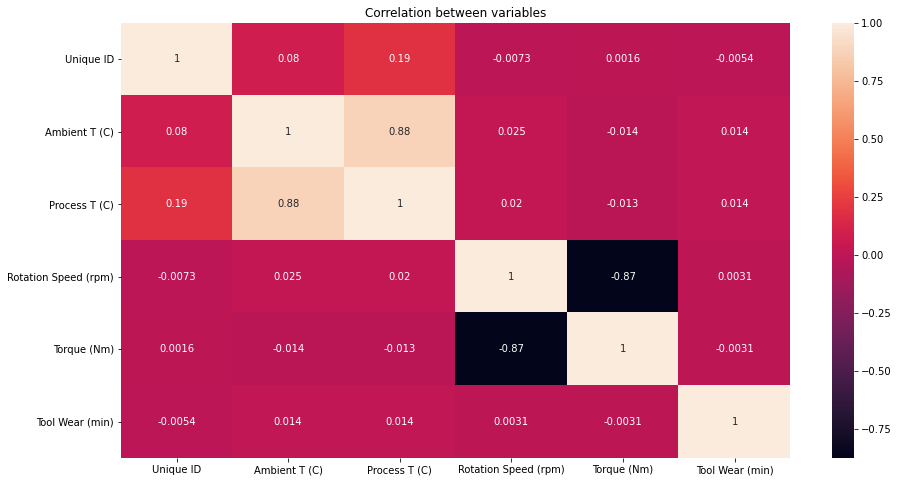

In [19]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_eda.corr(), annot=True).set(title="Correlation between variables")
plt.show()


<u><b>Summary</b></u>

<ul>
<li>We can see that Process T (C) and Ambient T (C) has a high positive correlation value at 0.88</li>
<li>We can see that Rotation Speed (rpm) and Torque (Nm) has a high negative correlation value at -0.87</li>
<li>In regards to the other variables, there is no clear correlations between them</li>
</ul>

Note: However, the Pearson's r Correlation is unable to calculate the correlation between qualitative data like Quality.


#### Dropping Redundant Columns

Things to be done:

1. Dropping features with high cardinality (Product ID) which means that Product ID does not have any clear correlation with machine status
2. Dropping features that are unique (Unique ID) as the values are unique although there are correlation between it and Process T and Ambient T


In [20]:
df.drop("Product ID", axis=1, inplace=True)
df.drop("Unique ID", axis=1, inplace=True)


# Data Preparation

Before we can train a machine learning algorithm on our data, we first need to prepare our data.

## Separate Target Label and Features

We will first separate our target label from the features. It is also necessary to perform a label encoding on the target label to convert it to a number.


In [21]:
X, y = df.drop("Machine Status", axis=1), df["Machine Status"]


# Splitting Data points

To evaluate our final chosen models, we will leave a small independent test set to report on the final performance of our classifiers. When building the hold out set, we use stratify to ensure that the distribution of classes is the same in both the independent set and the training set.


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, shuffle=True, random_state=random_state
)
X_training = X_train.copy()


In [23]:
X_training.shape


(16000, 6)

In [24]:
X_test.shape


(4000, 6)

# Data Preprocessing & Feature Engineering

As we have done the EDA of the data, we learn that we need to handle some missing values etc


### Handling missing data

Using the .isna().sum() methods from Pandas, we are able to sum up the numbers of missing data per column


In [25]:
X_training.isna().sum()


Quality                 775
Ambient T (C)             0
Process T (C)           318
Rotation Speed (rpm)    915
Torque (Nm)               0
Tool Wear (min)           0
dtype: int64

There are multiple ways to handle missing data:

1. Drop the entire column
2. Impute with Central Tendency (Mean, Mode or Median)
3. Impute with Advanced Algorithm in SKLearn (e.g. IterativeImputer, KNNImputer)


We will use the Advanced Algorithm in sklearn IterativeImputer. It will impute missing values by modelling each feature with missing values as a function of other features in a round-robin fashion.


In [26]:
# All Numerical Features that has missing values
num_cols = ["Rotation Speed (rpm)", "Process T (C)"]

# initialize Imputer
imputer = IterativeImputer()
# Impute Train Data
X_training.loc[:, num_cols] = imputer.fit_transform(X_training[num_cols])


We will be using SimpleImputer from sklearn.impute to impute missing values with the mode value for the categorical data points.


In [27]:
# All Categorical Features that has missing values
cat_cols = ["Quality"]

# initialize Imputer
imp = SimpleImputer(strategy="most_frequent")
# Impute Train Data
X_training.loc[:, cat_cols] = imp.fit_transform(X_training[cat_cols])

# Check if there are any left over na values
X_training.isna().sum()
X_training.sort_values("Ambient T (C)")



,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min)
918,M,22.15,36.901997,1473.000000,38.5,189
10918,M,22.25,32.650000,1473.000000,38.5,189
10916,M,22.25,32.750000,1589.000000,36.2,184
10917,L,22.25,32.650000,1475.000000,51.0,187
914,M,22.25,32.750000,1532.812429,40.6,178
...,...,...,...,...,...,...
15139,M,31.35,40.550000,1510.000000,38.9,199
5145,L,31.35,40.550000,1670.000000,32.9,7
15144,L,31.35,36.920774,1607.000000,33.5,5
15142,L,31.35,40.550000,1568.000000,39.1,0


### Categorical Encoding

As the our dataset still contains categorical data which is hard for some of sklearn's model to train on, we have to encode the data using one of the encoders.

1. pd.get_dummies()
2. One Hot Encoder
3. Label Encoder
4. Ordinal Encoder


We choose Label Encoder in this case as pd.get_dummies() is harder to implement in a pipeline, one hot encoder is for categorical data which are nominal which Quality is not.
We use Ordinal Encoder here as Label Encoder is used for target variables


In [28]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_training[["Quality"]] = enc.fit_transform(X_training[["Quality"]])
X_training


,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min)
16976,1.0,27.55,37.85,1344.000000,46.7,133
8407,1.0,25.25,36.35,1357.000000,50.1,125
2698,1.0,26.85,36.25,2010.000000,20.0,55
15263,1.0,30.45,39.75,1877.000000,22.3,96
716,0.0,24.25,35.45,1420.000000,45.8,120
...,...,...,...,...,...,...
459,1.0,24.25,35.45,1536.937399,42.3,107
6234,1.0,28.05,37.65,1479.000000,41.2,155
15586,2.0,29.35,38.75,1557.000000,31.5,49
14736,1.0,30.15,38.45,1513.000000,37.9,0


### Handling Imbalanced data through RESAMPLING

As mentioned before, the distribution of machine status is imbalanced, we can visualise this through plotting of the y_train values


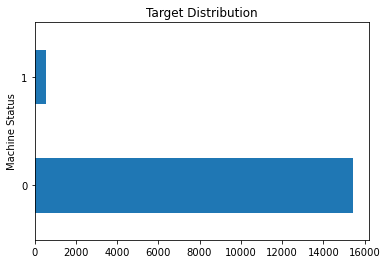

In [29]:
ax = y_train.value_counts().plot(
    kind="barh",
    title="Target Distribution",
    xlabel="Machine Status",
    ylabel="Number of Machines",
)


To solve this imbalanced, we can use the following solutions

1. Random Resampling
2. SMOTE (Synthetic Minority Oversampling Technique)

We will be using Random Resampling for this example. The reason is SMOTE is able to synthesize data which will affect columns like Quality which we have hot encoded.


In [30]:
resample = RandomOverSampler(random_state=11)

X_resampled_train, y_resampled_train = resample.fit_resample(X_training, y_train)
X_resampled_train


,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min)
0,1.0,27.55,37.85,1344.0,46.7,133
1,1.0,25.25,36.35,1357.0,50.1,125
2,1.0,26.85,36.25,2010.0,20.0,55
3,1.0,30.45,39.75,1877.0,22.3,96
4,0.0,24.25,35.45,1420.0,45.8,120
...,...,...,...,...,...,...
30911,2.0,29.55,37.95,1297.0,60.7,125
30912,2.0,29.55,37.95,1297.0,60.7,125
30913,1.0,26.35,37.75,1376.0,53.9,215
30914,0.0,30.55,39.15,1371.0,54.6,112


Let's see what happened after resampling


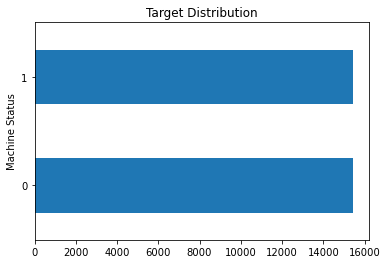

In [31]:
ax = y_resampled_train.value_counts().plot(
    kind="barh",
    title="Target Distribution",
    xlabel="Machine Status",
    ylabel="Number of Machines",
)


### Feature Engineering

There are certain factors which can affect machines like:

1. Temperature difference
2. High horsepower


**_Formulas for the factors:_**

**Temperature Difference**
\begin{equation}
\Delta Temp = Process Temp - Ambient Temp
\end{equation}

**Horsepower**
\begin{equation}
Horsepower = Torque \times \frac{Rotation Speed}{5252}
\end{equation}


In [32]:
# Calculating Temperature Difference
X_resampled_train["Temp Diff (C)"] = (
    X_resampled_train["Process T (C)"] - X_resampled_train["Ambient T (C)"]
)


# Calculating Horsepower
X_resampled_train["Horsepower (HP)"] = (
    X_resampled_train["Torque (Nm)"] * X_resampled_train["Rotation Speed (rpm)"] / 5252
)

X_resampled_train


,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Temp Diff (C),Horsepower (HP)
0,1.0,27.55,37.85,1344.0,46.7,133,10.3,11.950647
1,1.0,25.25,36.35,1357.0,50.1,125,11.1,12.944726
2,1.0,26.85,36.25,2010.0,20.0,55,9.4,7.654227
3,1.0,30.45,39.75,1877.0,22.3,96,9.3,7.969745
4,0.0,24.25,35.45,1420.0,45.8,120,11.2,12.383092
...,...,...,...,...,...,...,...,...
30911,2.0,29.55,37.95,1297.0,60.7,125,8.4,14.990080
30912,2.0,29.55,37.95,1297.0,60.7,125,8.4,14.990080
30913,1.0,26.35,37.75,1376.0,53.9,215,11.4,14.121554
30914,0.0,30.55,39.15,1371.0,54.6,112,8.6,14.252970


### Standardization

We will be using StandardScaler as the standardize. Standard Scaler will scale the data so that the mean is 0 and standard deviation is 1 which makes it easier for the model to work.

(Note Logistic Regression and Tree Based Models are not sensitive to the magnitude of the variables and standardizing is not necessary)


In [33]:
num_col = [
    "Ambient T (C)",
    "Process T (C)",
    "Rotation Speed (rpm)",
    "Torque (Nm)",
    "Horsepower (HP)",
    "Temp Diff (C)",
]
scale = StandardScaler()

X_scale_train = X_resampled_train.copy()
X_scale_train[num_col] = scale.fit_transform(X_scale_train[num_col])
X_scale_train


,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Temp Diff (C),Horsepower (HP)
0,1.0,0.099631,0.572520,-0.608914,0.135367,133,0.515626,-0.119779
1,1.0,-1.011896,-0.496896,-0.564689,0.370117,125,1.206723,0.212707
2,1.0,-0.238660,-0.568191,1.656773,-1.708107,55,-0.261859,-1.556790
3,1.0,1.501121,1.927115,1.204316,-1.549306,96,-0.348246,-1.451260
4,0.0,-1.495168,-1.138547,-0.350367,0.073228,120,1.293110,0.024859
...,...,...,...,...,...,...,...,...
30911,2.0,1.066175,0.643815,-0.768805,1.101983,125,-1.125730,0.896811
30912,2.0,1.066175,0.643815,-0.768805,1.101983,125,-1.125730,0.896811
30913,1.0,-0.480296,0.501226,-0.500052,0.632484,215,1.465884,0.606317
30914,0.0,1.549448,1.499348,-0.517062,0.680815,112,-0.952956,0.650272


After standardizing the data, let's see what it did to the data, we can see that the data has a mean of 0 and looks generally normal


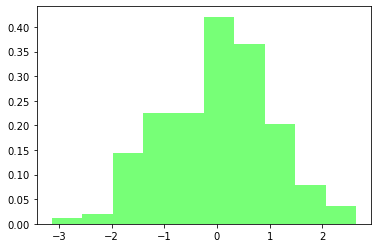

In [80]:
scaled_df = pd.concat([X_scale_train, y_resampled_train], axis=1, join="outer")
# Process T (C)
plt.hist(scaled_df["Process T (C)"], density=True, bins=10, color="#00ff0088")
plt.show()


# Model Selection

My plan for model selection is to run the data through some models and deem the best model based on metrics and explainability.


### Pipeline settings

We use pipelines to prevent data leakage.


In [35]:
def horsepower(df):
    df = pd.DataFrame(
        df,
        columns=[
            "Quality",
            "Rotation Speed (rpm)",
            "Process T (C)",
            "Ambient T (C)",
            "Torque (Nm)",
            "Tool Wear (min)",
        ],
    )
    df["Horsepower (HP)"] = df["Torque (Nm)"] * df["Rotation Speed (rpm)"] / 5252
    return df


def temp_diff(df):
    df["Temp Diff (C)"] = df["Process T (C)"] - df["Ambient T (C)"]
    return df


categorical_transformer = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="most_frequent")),
        (
            "encoder",
            OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
        ),
    ]
)

numeric_transformer = Pipeline([("imputer", IterativeImputer())])

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_transformer, ["Quality"]),
        ("numeric", numeric_transformer, ["Rotation Speed (rpm)", "Process T (C)"]),
    ],
    remainder="passthrough",
)

smt = RandomOverSampler(random_state=11)

steps = [
    ("preprocessing", preprocessor),
    ("over", smt),
    ("horsepower eng", FunctionTransformer(horsepower)),
    ("temp diff eng", FunctionTransformer(temp_diff)),
    ("standardize", StandardScaler()),
    ("model"),
]
STEP_LEN = len(steps) - 1


### Scoring Methods

We will be using the following metrics to evaluate the model

**Accuracy**

- We use accuracy as a scoring metric as we have balanced the data and we want to look and what is the % of correctly predicted machine status

**Balanced Accuracy**

- Even though we have resampled the training data, the test data is imbalanced and might lead to some difference in the %

**f1 score**

- Harmonic mean of recall and recall, it does not care about how many true negatives are being classified

**ROC_AUC**

- ROC_AUC also known as Area Under the Receiver Operating Characteristic Curve allow us to range of possibilities for observation(probability) in our classification

**Recall**

- We use recall as higher the recall, the lower the FN which is important in this context


In [36]:
# preset scoring options
scoring_methods = ["accuracy", "balanced_accuracy", "recall", "f1", "roc_auc"]



## Baseline model

A baseline model is simple and interpretable, easy to infer upon. I am going to use DummyClassifier as a stupid baseline to benchmark against my system later on.

stratified: generates predictions by respecting the training set’s class distribution.


In [37]:
steps[STEP_LEN] = ("model", DummyClassifier(strategy="uniform"))
dummy = Pipeline(steps=steps)
dummy.fit(X_train, y_train)
print(f"Baseline Accuracy Score :{dummy.score(X_test, y_test)}")
scores = cross_validate(
    dummy,
    X_train,
    y_train,
    cv=10,
    scoring=scoring_methods,
    n_jobs=4,
    return_train_score=True,
)
# displaying scores
display(
    pd.DataFrame(scores)
    .append(pd.Series(pd.DataFrame(scores).mean(), name="Mean"))
    .style.apply(
        lambda x: [
            "background-color: red; color: white" if v else "" for v in x == x.min()
        ]
    )
    .apply(
        lambda x: [
            "background-color: green; color: white" if v else "" for v in x == x.max()
        ]
    )
)



Baseline Accuracy Score :0.5005


,fit_time,score_time,test_accuracy,train_accuracy,test_balanced_accuracy,train_balanced_accuracy,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
0,0.096058,0.045877,0.528750,0.503819,0.514877,0.495056,0.500000,0.485656,0.066832,0.062213,0.500000,0.500000
1,0.100053,0.041888,0.529375,0.502083,0.533072,0.504044,0.537037,0.506148,0.071517,0.064457,0.500000,0.500000
2,0.095067,0.044881,0.483750,0.498542,0.446912,0.510120,0.407407,0.522541,0.050575,0.065968,0.500000,0.500000
3,0.082457,0.043882,0.499375,0.504375,0.490741,0.524015,0.481481,0.545082,0.060961,0.069370,0.500000,0.500000
4,0.053857,0.043882,0.513750,0.500625,0.524987,0.494392,0.537037,0.487705,0.069378,0.062084,0.500000,0.500000
5,0.047872,0.042884,0.511875,0.497361,0.497209,0.481827,0.481481,0.465164,0.062425,0.059022,0.500000,0.500000
6,0.062832,0.044880,0.491875,0.496389,0.495796,0.510984,0.500000,0.526639,0.062284,0.066186,0.500000,0.500000
7,0.064826,0.041888,0.521250,0.497986,0.519932,0.495003,0.518519,0.491803,0.068127,0.062265,0.500000,0.500000
8,0.067819,0.035904,0.520000,0.499653,0.505972,0.515177,0.490909,0.531828,0.065693,0.067072,0.500000,0.500000
9,0.062831,0.032913,0.480000,0.503264,0.546631,0.503175,0.618182,0.503080,0.075556,0.064111,0.500000,0.500000


<u><b>Observations</b></u>

- The ROC AUC score is 0.5 this means that the model is randomly selecting and predicting the points
- The model is severely under-fitted as the accuracy from the training set is very low


## Checking through the different models

We import some of the important models from the sklearn model and check which model is the best using their default parameters.

We will be using accuracy, balanced_accuracy, f1, recall and roc_auc to score the models.


### Learning Curves

Learning Curves is a correlation between a learner's performance on a task and the number of attempts or time required to complete the task.

Before we begin, we need to make a function for us to plot the learning curve


In [38]:
def plot_learning_curve(
    model,
    X,
    y,
    scoring,
    cv=StratifiedKFold(shuffle=True, random_state=42),
    train_sizes=np.linspace(0.1, 1.0, 10),
    ax=None,
):
    try:
        model_name = type(model[-1]).__name__
    except:
        model_name = type(model).__name__
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        model,
        X,
        y,
        cv=cv,
        n_jobs=-1,
        train_sizes=train_sizes,
        return_times=True,
        scoring=scoring,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    ax.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    ax.legend(loc="best")
    ax.set(
        ylim=(
            min(np.nanmin(train_scores), np.nanmin(test_scores)) - 0.01,
            max(np.nanmax(train_scores), np.nanmax(test_scores)) + 0.01,
        )
    )
    ax.set_title(f"Learning Curve of {model_name}")
    ax.set_ylabel(f"{scoring}")
    ax.set_xlabel("Train Sizes")
    return ax



### Defining models


In [39]:
# Initiate Classifiers with default hyper parameters
models = [
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("RandomForestClassifier", RandomForestClassifier()),
    ("AdaBoostClassifier", AdaBoostClassifier()),
    ("LogisticRegression", LogisticRegression()),
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("Perceptron", Perceptron()),
    ("ExtraTreesClassifier", ExtraTreesClassifier()),
    ("GaussianNB", GaussianNB()),
    ("RidgeClassifier", RidgeClassifier()),
    ("RidgeClassifierCV", RidgeClassifierCV()),
    ("SGDClassifier", SGDClassifier()),
]


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    2.7s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   15.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    8.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    3.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    8.9s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   16.6s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   

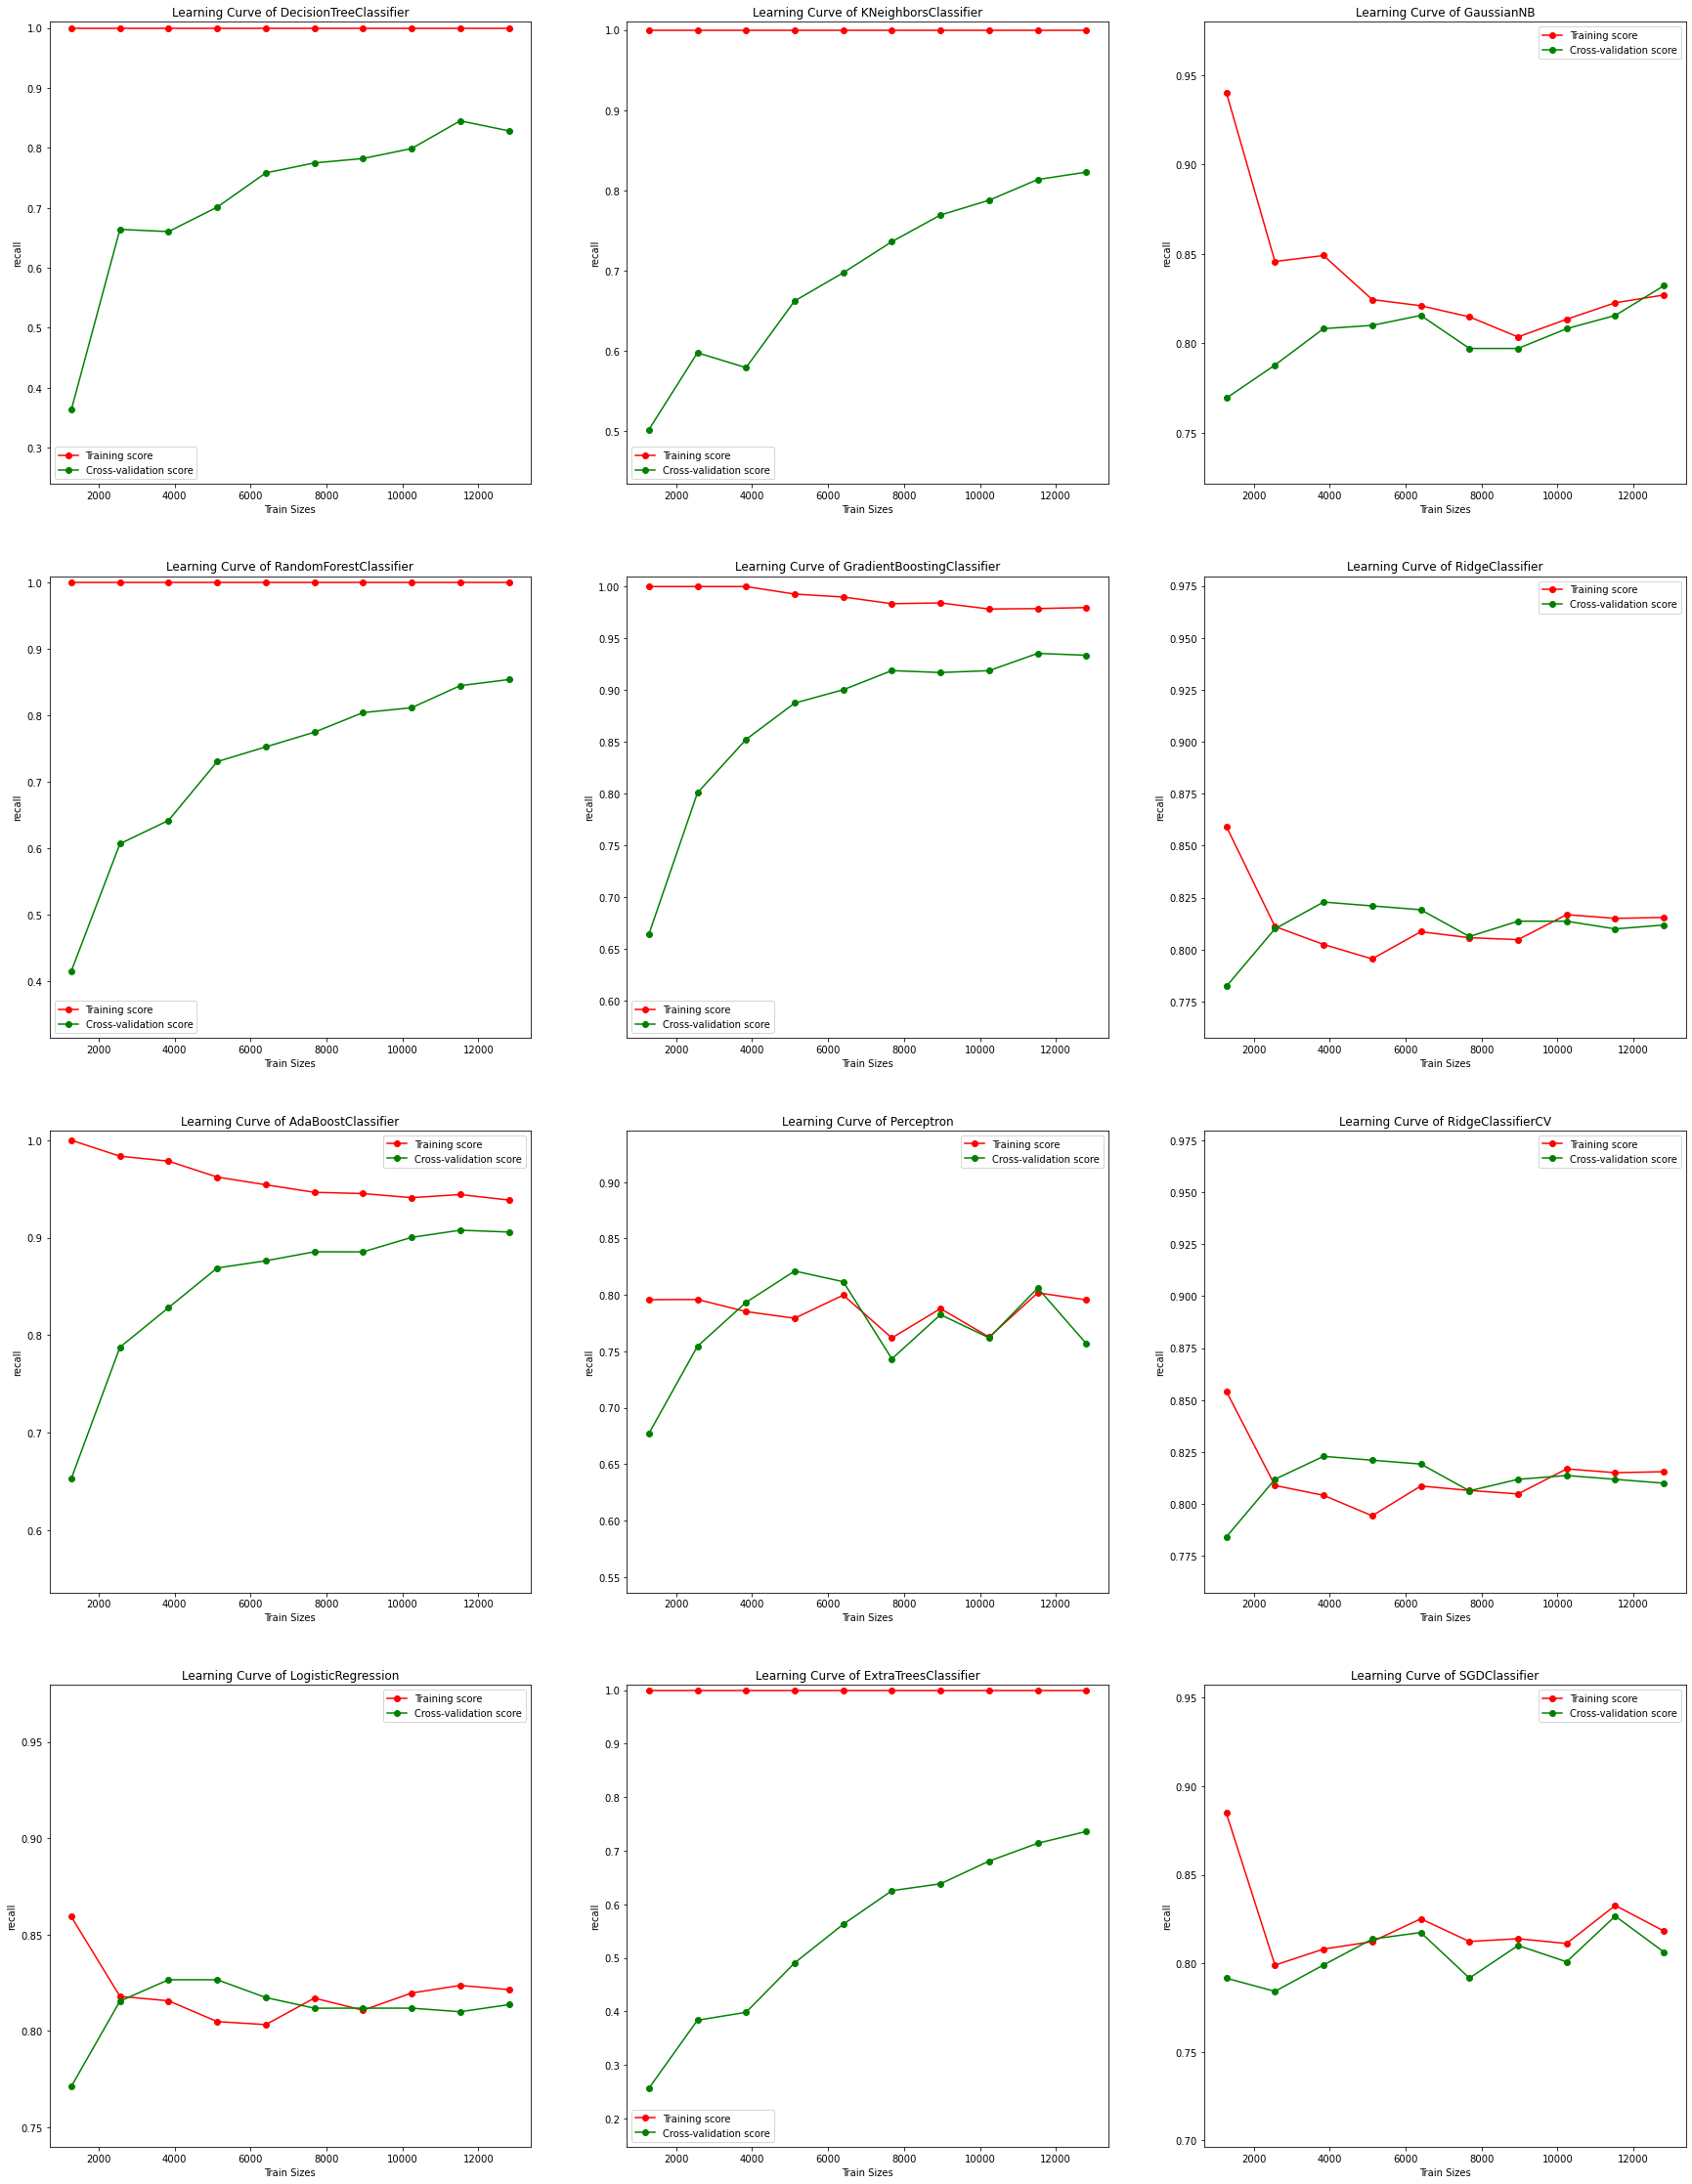

In [40]:
def select_model(X_train, y_train, models, scoring, ax):
    # placeholder
    out = []
    # iterate through models
    for name, model in models:
        # creating temporary pipeline
        steps[STEP_LEN] = (name, model)
        temp_pipeline = Pipeline(steps=steps)
        plot_learning_curve(
            temp_pipeline,
            X_train,
            y_train,
            scoring="recall",
            ax=ax[models.index((name, model)) % 4, models.index((name, model)) // 4],
        )
        # cross validate
        score = cross_validate(
            temp_pipeline,
            X_train,
            y_train,
            scoring=scoring,
            n_jobs=3,
            verbose=1,
            cv=10,
            return_train_score=True,
        )
        # get the average score and then store in a Series
        out.append(pd.Series(score, name=name).apply(np.mean))
    return pd.DataFrame(out).sort_values(
        by=[
            "test_f1",
            "test_recall",
            "test_accuracy",
            "test_balanced_accuracy",
            "test_roc_auc",
        ],
        ascending=False,
    )


# Since we are comparing 12 models
fig, ax = plt.subplots(4, 3, figsize=(30, 40))

model_scores = select_model(X_train, y_train, models, scoring_methods, ax)
plt.show()


**Observations**

As you can see from the learning curves, the learning curve for Adaboost and Gradient Boosting when more data is fitted to the model, the cross validation score decreases.

The K Nearest Neighbour, RandomForest, ExtraTrees and DecisionTree have good learning curves are when more data is fitted to the model, the cross validation score increases and training scores remains constant. This shows that the model are becoming more generalised


In [41]:
model_scores.style.apply(
    lambda x: ["background-color: red; color: white" if v else "" for v in x == x.min()]
).apply(
    lambda x: [
        "background-color: green; color: white" if v else "" for v in x == x.max()
    ]
)


,fit_time,score_time,test_accuracy,train_accuracy,test_balanced_accuracy,train_balanced_accuracy,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
RandomForestClassifier,2.769180,0.124666,0.994875,0.999993,0.943109,0.999996,0.887576,1.000000,0.921417,0.999898,0.992733,1.000000
ExtraTreesClassifier,1.487705,0.144115,0.992500,1.000000,0.895649,1.000000,0.791751,1.000000,0.876110,1.000000,0.994450,1.000000
DecisionTreeClassifier,0.164707,0.038597,0.991250,1.000000,0.924255,1.000000,0.852391,1.000000,0.868233,1.000000,0.924255,1.000000
KNeighborsClassifier,0.164795,0.218288,0.971687,0.984944,0.913237,0.992208,0.850539,1.000000,0.671623,0.818202,0.931659,1.000000
GradientBoostingClassifier,3.679325,0.035223,0.954500,0.957701,0.945261,0.968120,0.935354,0.979296,0.583340,0.610922,0.988038,0.995667
AdaBoostClassifier,1.191534,0.070356,0.936937,0.939854,0.924640,0.939696,0.911448,0.939526,0.495345,0.514405,0.977103,0.983522
SGDClassifier,0.205749,0.042787,0.856250,0.855417,0.838386,0.835071,0.819226,0.813246,0.280022,0.276998,0.914556,0.913964
RidgeClassifierCV,0.115091,0.048271,0.855937,0.856590,0.834668,0.838446,0.811852,0.818983,0.276723,0.279015,0.913659,0.915141
RidgeClassifier,0.091454,0.045877,0.855813,0.856563,0.834604,0.838432,0.811852,0.818983,0.276560,0.278977,0.913657,0.915142
GaussianNB,0.083975,0.045678,0.851313,0.852201,0.835917,0.840030,0.819394,0.826974,0.272207,0.274889,0.908612,0.909493


<u><b>Observations</b></u>

- Some models performs equally well with 100% mean cross-validation accuracy score of 5 folds, highlighted in green.
- Perceptron is the worst performing model because there is no clear separation for the perceptron model to divide as seen in the pairplot.

<u><b>Selection of model</b></u>

Therefore, we will use the RandomForestClassifier. Not only does it have one of the best accuracy. However f1 is more important than accuracy in comparing between models. The RandomForestClassifier has the highest f1 score for both test_f1 and train_f1. Therefore we will be using the RandomForestClassifier. We will also test the DecisionTreeClassifier as our other option and do another comparison. The reason being that DecisionTree is one of the more explainable models with a quick fit time, high f1 score and high accuracy. 


## Initializing RandomForestClassifier


In [42]:
steps[STEP_LEN] = ("model", RandomForestClassifier())

tree_clf = Pipeline(steps=steps)
tree_clf.fit(X_train, y_train)
print(f"Model Accuracy Score :{tree_clf.score(X_train, y_train)}")
scores = cross_validate(
    tree_clf,
    X_train,
    y_train,
    cv=10,
    scoring=scoring_methods,
    n_jobs=4,
    return_train_score=True,
)
# displaying scores
display(
    pd.DataFrame(scores)
    .append(pd.Series(pd.DataFrame(scores).mean(), name="Mean"))
    .style.apply(
        lambda x: [
            "background-color: red; color: white" if v else "" for v in x == x.min()
        ]
    )
    .apply(
        lambda x: [
            "background-color: green; color: white" if v else "" for v in x == x.max()
        ]
    )
)


Model Accuracy Score :1.0


,fit_time,score_time,test_accuracy,train_accuracy,test_balanced_accuracy,train_balanced_accuracy,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
0,2.932159,0.150599,0.995000,1.000000,0.934862,1.000000,0.870370,1.000000,0.921569,1.000000,0.999036,1.000000
1,2.921188,0.149601,0.996250,1.000000,0.944444,1.000000,0.888889,1.000000,0.941176,1.000000,0.988243,1.000000
2,2.942132,0.148603,0.993125,1.000000,0.942827,1.000000,0.888889,1.000000,0.897196,1.000000,0.999054,1.000000
3,2.896255,0.146607,0.996250,1.000000,0.962316,1.000000,0.925926,1.000000,0.943396,1.000000,0.999443,1.000000
4,2.575112,0.140623,0.994375,1.000000,0.925603,1.000000,0.851852,1.000000,0.910891,1.000000,0.997383,1.000000
5,2.566140,0.153591,0.996250,1.000000,0.962316,1.000000,0.925926,1.000000,0.943396,1.000000,0.986327,1.000000
6,2.622987,0.133643,0.993125,1.000000,0.924956,1.000000,0.851852,1.000000,0.893204,1.000000,0.988597,1.000000
7,2.623985,0.139627,0.995000,1.000000,0.943798,1.000000,0.888889,1.000000,0.923077,1.000000,0.984494,1.000000
8,1.901914,0.070810,0.993125,1.000000,0.926302,1.000000,0.854545,1.000000,0.895238,1.000000,0.995487,1.000000
9,1.911866,0.070810,0.993750,1.000000,0.935393,1.000000,0.872727,1.000000,0.905660,1.000000,0.997711,1.000000


<u><b>Observations</b></u>

- 10 fold cross validation shows that the model is strong at predicting based on the high test accuracy, test f1 score


# Initializing DecisionTreeClassifier


In [43]:
steps[STEP_LEN] = ("model", DecisionTreeClassifier())

d_tree_clf = Pipeline(steps=steps)
d_tree_clf.fit(X_train, y_train)
print(f"Model Accuracy Score :{d_tree_clf.score(X_train, y_train)}")
scores = cross_validate(
    d_tree_clf,
    X_train,
    y_train,
    cv=10,
    scoring=scoring_methods,
    n_jobs=4,
    return_train_score=True,
)
# displaying scores
display(
    pd.DataFrame(scores)
    .append(pd.Series(pd.DataFrame(scores).mean(), name="Mean"))
    .style.apply(
        lambda x: [
            "background-color: red; color: white" if v else "" for v in x == x.min()
        ]
    )
    .apply(
        lambda x: [
            "background-color: green; color: white" if v else "" for v in x == x.max()
        ]
    )
)


Model Accuracy Score :1.0


,fit_time,score_time,test_accuracy,train_accuracy,test_balanced_accuracy,train_balanced_accuracy,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
0,0.194480,0.048870,0.991875,1.000000,0.915373,1.000000,0.833333,1.000000,0.873786,1.000000,0.915373,1.000000
1,0.189487,0.044880,0.987500,1.000000,0.904173,1.000000,0.814815,1.000000,0.814815,1.000000,0.904173,1.000000
2,0.193481,0.045878,0.990000,1.000000,0.923339,1.000000,0.851852,1.000000,0.851852,1.000000,0.923339,1.000000
3,0.190490,0.046877,0.991250,1.000000,0.941857,1.000000,0.888889,1.000000,0.872727,1.000000,0.941857,1.000000
4,0.184506,0.049868,0.991875,1.000000,0.924309,1.000000,0.851852,1.000000,0.876190,1.000000,0.924309,1.000000
5,0.186499,0.048870,0.992500,1.000000,0.969311,1.000000,0.944444,1.000000,0.894737,1.000000,0.969311,1.000000
6,0.193480,0.048870,0.990625,1.000000,0.905790,1.000000,0.814815,1.000000,0.854369,1.000000,0.905790,1.000000
7,0.208440,0.044880,0.992500,1.000000,0.933568,1.000000,0.870370,1.000000,0.886792,1.000000,0.933568,1.000000
8,0.157578,0.034906,0.991250,1.000000,0.907796,1.000000,0.818182,1.000000,0.865385,1.000000,0.907796,1.000000
9,0.160568,0.035904,0.993750,1.000000,0.926625,1.000000,0.854545,1.000000,0.903846,1.000000,0.926625,1.000000


<u><b>Observations</b></u>

- 10 fold cross validation shows that the model is strong at predicting based on the high test accuracy and high test f1 score


## Comparing models with baseline

To compare the RandomForestClassifier and Baseline model and DecisionTreeClassifier, we will use the following attributes.

1. Confusion Matrix
2. Learning Curve


### Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classifier on a set of test data for which the true values are known.


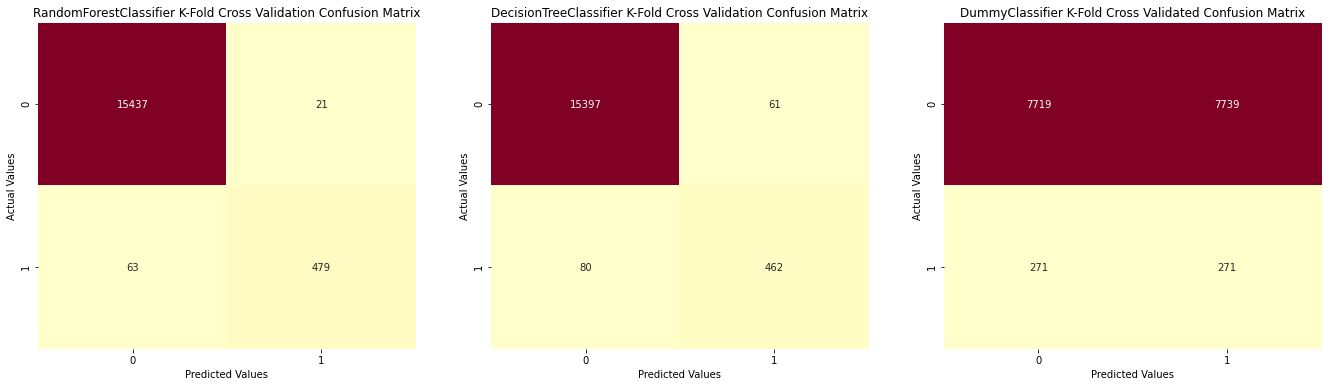

In [44]:
# Cross Validating Confusion Matrix
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(23, 6))
# RandomForestClassifier
tree_cm = confusion_matrix(
    y_train, cross_val_predict(tree_clf, X_train, y_train, cv=10)
)
sns.heatmap(tree_cm, annot=True, fmt="", ax=ax1, cbar=False, cmap="YlOrRd")
ax1.set_title("RandomForestClassifier K-Fold Cross Validation Confusion Matrix")
ax1.set_ylabel("Actual Values")
ax1.set_xlabel("Predicted Values")

# DecisionTreeClassifier
d_tree_cm = confusion_matrix(
    y_train, cross_val_predict(d_tree_clf, X_train, y_train, cv=10)
)
sns.heatmap(d_tree_cm, annot=True, fmt="", ax=ax2, cbar=False, cmap="YlOrRd")
ax2.set_title("DecisionTreeClassifier K-Fold Cross Validation Confusion Matrix")
ax2.set_ylabel("Actual Values")
ax2.set_xlabel("Predicted Values")

# Baseline
dummy_cm = confusion_matrix(y_train, cross_val_predict(dummy, X_train, y_train, cv=10))
sns.heatmap(dummy_cm, annot=True, fmt="", ax=ax3, cbar=False, cmap="YlOrRd")
ax3.set_title("DummyClassifier K-Fold Cross Validated Confusion Matrix")
ax3.set_ylabel("Actual Values")
ax3.set_xlabel("Predicted Values")

plt.show()



#### How Confusion Matrix Works in this context?

The following image is created using Google Slides:

<center><img src="https://media.discordapp.net/attachments/910885868733087747/977798969478488084/unknown.png"></center>

Legend:<br/>
FN => False Negative<br/>
TN => True Negative<br/>
FP => False Positive<br/>
TP => True Positive

In this case, we want to reduce FP as we do not want to get maintenance for a machine which is actually working perfectly and we also want to reduce FN as the machine has failed and it is predicted to be working can cause a halt in production.

\*\*Therefore, FN is more important and needs to be smaller than FP


**Observations**

- Baseline model's predictions are all over the place
- RandomForestClassifier model predictions for FN is 68 and FP is 20 (Close To 0 based %). This means that the model is able to help us predict with minor errors.
- DecisionTreeClassifier model predictions for FN is 77 and FP is 61 (Close To 0 based %). This means that the model is able to help us predict with minor errors.


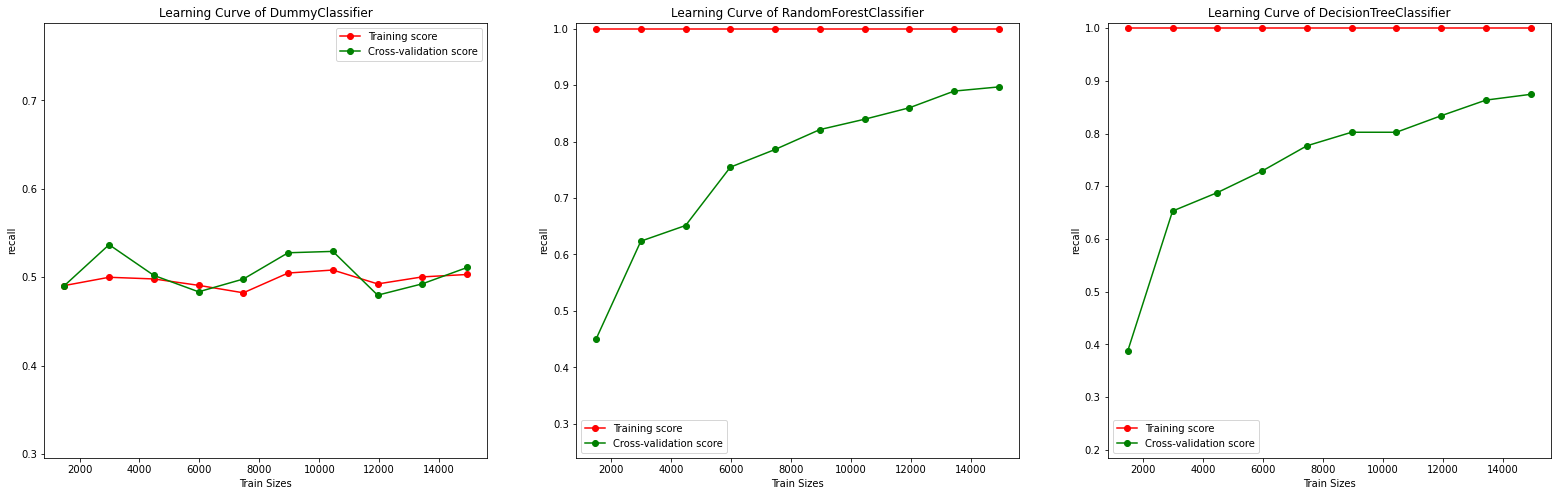

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(27, 8))
plot_learning_curve(dummy, X_train, y_train, scoring="recall", cv=15, ax=ax1)
plot_learning_curve(tree_clf, X_train, y_train, scoring="recall", cv=15, ax=ax2)
plot_learning_curve(d_tree_clf, X_train, y_train, scoring="recall", cv=15, ax=ax3)
plt.show()


**Observations**

- Learning Curve for DummyClassifier is very random and is unrepresentative. This shows that the model is severely under-fitted
- Learning Curve of RandomForestClassifier and DecisionTreeClassifier is increases and becomes more generalised as more data is added
- However, the f1 curve of RandomForestClassifier has a higher end point compared to the DecisionTreeClassifier which can suggest that RandomForestClassifier is a better model


#### Generating predictions

we want to see how the model fair against unseen data


In [46]:
tree_y_pred = tree_clf.predict(X_test)
d_tree_y_pred = d_tree_clf.predict(X_test)
# Classification Report
print(
    f"""
RandomForestClassifier:
{classification_report(y_test, tree_y_pred, digits=3)}

DecisionTreeClassifier:
{classification_report(y_test, d_tree_y_pred, digits=3)}
"""
)



RandomForestClassifier:
              precision    recall  f1-score   support

           0      0.996     1.000     0.998      3864
           1      0.992     0.875     0.930       136

    accuracy                          0.996      4000
   macro avg      0.994     0.937     0.964      4000
weighted avg      0.995     0.996     0.995      4000


DecisionTreeClassifier:
              precision    recall  f1-score   support

           0      0.995     0.997     0.996      3864
           1      0.913     0.846     0.878       136

    accuracy                          0.992      4000
   macro avg      0.954     0.921     0.937      4000
weighted avg      0.992     0.992     0.992      4000




**Observations**

* By comparing f1 scores, RandomForestClassifier is better as the f1 score for RandomForestClassifier(0.930) is higher than f1 score for DecisionTreeClassifier(0.862)
* As explained in the confusion matrix section, RandomForestClassifier is once again better due to the higher recall score for RandomForestClassifier(0.875) compared to DecisionTreeClassifier(0.824)
* In terms of accuracy, RandomForestClassifier is slightly higher than DecisionTreeClassifier at 0.996 and 0.991 respectively
* However, more improvement can be done to the model to make it better


# Model Improvement

Although our models perform very well, there are still some improvements to be made to our models by simplifying them to make them more generalizable. Let's see what are the possible params that can be tuned.


In [47]:
list(RandomForestClassifier().get_params().keys())


['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [48]:
list(DecisionTreeClassifier().get_params().keys())


['ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'random_state',
 'splitter']

### Hyperparameter Tuning and Evaluation

We will be using RandomizedSearchCV to run through the parameters to see which model's parameter will give the best f1 score.

Parameters to be tuned (RandomForestClassifier):

1. max_depth - maximum depth of the tree, basically how big can the tree grow
2. max_leaf_nodes - stopping criteria for number of leaves
3. n_estimators - The number of trees in the forest

Parameters to be tuned (DecisionTreeClassifier):

1. max_depth - maximum depth of the tree, basically how big can the tree grow
2. max_leaf_nodes - stopping criteria for number of leaves

### RandomizedSearchCV

The only difference between both the approaches is in grid search we define the combinations and do training of the model whereas in RandomizedSearchCV the model selects the combinations randomly. This means that generally RandomizedSearchCV will be faster than GridSearchCV. GridSearchCV will find the best values based on scoring metrics by training however, RandomizedSearchCV will choose n_iter (default=10) and compare to see which of the following gives the best metrics


In [49]:
# Create the parameter grid
params_grid = {
    "max_depth": [5,10,20,30,40,50,60,70,80,90,100],
    "max_leaf_nodes": np.arange(10, 16),
    "n_estimators": [100, 500, 1000],
}

# Creating a model based on the pipeline
steps[STEP_LEN] = (
    "hyper",
    RandomizedSearchCV(
        RandomForestClassifier(
            min_samples_split=2, min_samples_leaf=1, criterion="entropy"
        ),
        params_grid,
        cv=15,
        verbose=1,
        n_jobs=-1,
        scoring="f1",
        n_iter=50,
        random_state=22,
    ),
)

tree_random_search = Pipeline(steps=steps)
# Fitting Model
tree_random_search.fit(X_train, y_train)

print(tree_random_search.named_steps["hyper"].best_estimator_)
print(tree_random_search.named_steps["hyper"].best_params_)
print(tree_random_search.named_steps["hyper"].best_score_)



Fitting 15 folds for each of 50 candidates, totalling 750 fits
RandomForestClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=14,
                       n_estimators=500)
{'n_estimators': 500, 'max_leaf_nodes': 14, 'max_depth': 5}
0.9458790778637244


In [50]:
# Create the parameter grid
params_grid = {"max_depth": [5,10,20,30,40,50,60,70,80,90,100], "max_leaf_nodes": np.arange(10, 16)}

# Creating a model based on the pipeline
steps[STEP_LEN] = (
    "hyper",
    RandomizedSearchCV(
        DecisionTreeClassifier(
            min_samples_split=2, min_samples_leaf=1, criterion="entropy"
        ),
        params_grid,
        cv=15,
        verbose=1,
        n_jobs=-1,
        scoring="f1",
        n_iter=50,
        random_state=22,
    ),
)

d_tree_random_search = Pipeline(steps=steps)
# Fitting Model
d_tree_random_search.fit(X_train, y_train)
print(d_tree_random_search.named_steps["hyper"].best_estimator_)
print(d_tree_random_search.named_steps["hyper"].best_params_)
print(d_tree_random_search.named_steps["hyper"].best_score_)


Fitting 15 folds for each of 50 candidates, totalling 750 fits
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=15)
{'max_leaf_nodes': 15, 'max_depth': 5}
0.9484652590960423


# Model Evaluation

We will evaluate the model on an independent test set to see if the model is able to generalize to unseen examples


In [51]:
y_test.shape


(4000,)

There are 4000 unseen test examples


### Initiate model after hyperparameter training

After training, we will have the model which will perform the best. Let's see if there is a boost in results after training


In [52]:
steps[STEP_LEN] = (
    "model",
    tree_random_search.named_steps["hyper"].best_estimator_,
)

tuned_tree_clf = Pipeline(steps=steps)
# Fitting Model
tuned_tree_clf.fit(X_train, y_train)
# Creating predictions
tree_y_pred = tuned_tree_clf.predict(X_test)


In [53]:
steps[STEP_LEN] = (
    "model",
    d_tree_random_search.named_steps["hyper"].best_estimator_,
)

tuned_d_tree_clf = Pipeline(steps=steps)
# Fitting Model
tuned_d_tree_clf.fit(X_train, y_train)
# Creating predictions
d_tree_y_pred = tuned_d_tree_clf.predict(X_test)


### Comparing RandomForestClassifier and DecisionTreeClassifier

#### ROC Curve


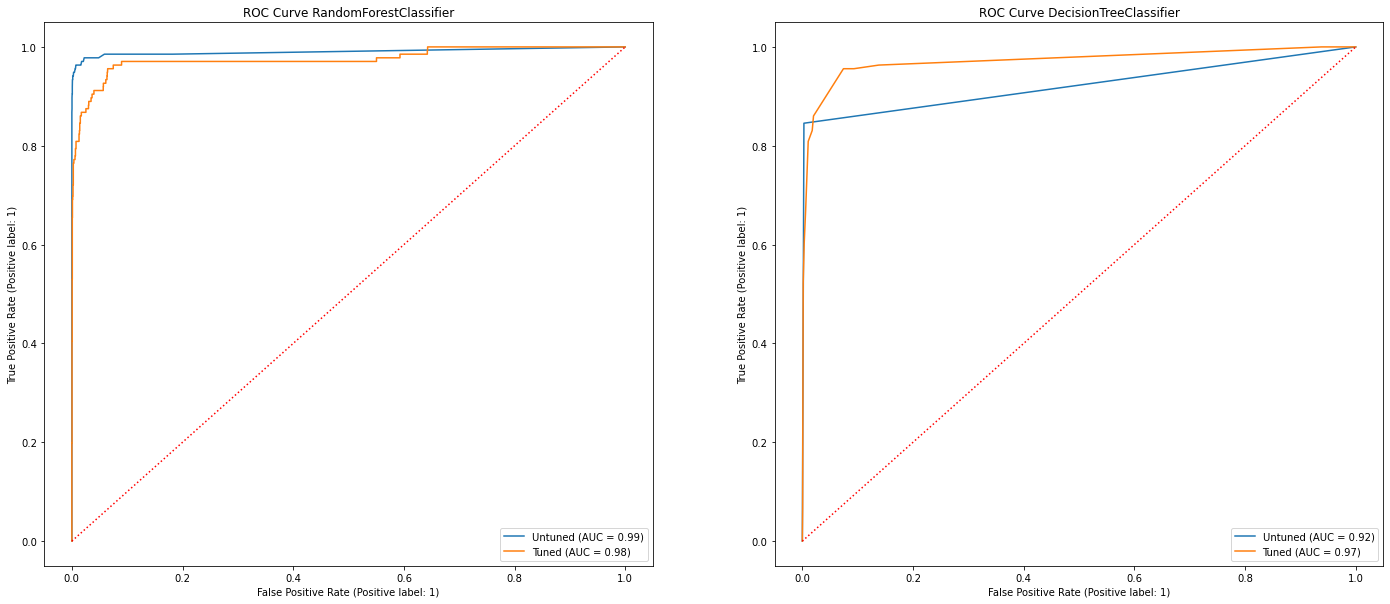

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(24, 10))
# RandomForestClassifier
RocCurveDisplay.from_estimator(tree_clf, X_test, y_test, ax=ax[0], name="Untuned")
RocCurveDisplay.from_estimator(tuned_tree_clf, X_test, y_test, ax=ax[0], name="Tuned")

# DecisionTreeClassifier
RocCurveDisplay.from_estimator(d_tree_clf, X_test, y_test, ax=ax[1], name="Untuned")
RocCurveDisplay.from_estimator(tuned_d_tree_clf, X_test, y_test, ax=ax[1], name="Tuned")

# 50% line
x = np.linspace(0, 1, 2)
ax[0].plot(x, x, ":", color="red")
ax[1].plot(x, x, ":", color="red")

ax[0].set_title("ROC Curve RandomForestClassifier")
ax[1].set_title("ROC Curve DecisionTreeClassifier")
plt.show()


<u><b>Observations</b></u>

We can see that the Untuned RandomForestClassifier has a higher Area Under ROC Curve (AUC) compared to the Tuned RandomForestClassifier this is because of the Max Depth Parameter that we have tuned. Compared to DecisionTreeClassifier, the Tuned DecisionTreeClassifier has a higher AUC than Untuned DecisionTreeClassifier. AUC for the Tuned  RandomForestClassifier is slightly higher at 0.98 while Tuned DecisionTreeClassifier is 0.97. This means that RandomForestClassifier is better performance at distinguishing between machine status compared to DecisionTreeClassifier

In [55]:
# Classification Report
print(
    f"""
RandomForestClassifier:
{classification_report(y_test, tree_y_pred, digits=3)}

DecisionTreeClassifier:
{classification_report(y_test, d_tree_y_pred, digits=3)}
"""
)



RandomForestClassifier:
              precision    recall  f1-score   support

           0      0.999     0.921     0.958      3864
           1      0.300     0.963     0.458       136

    accuracy                          0.922      4000
   macro avg      0.650     0.942     0.708      4000
weighted avg      0.975     0.922     0.941      4000


DecisionTreeClassifier:
              precision    recall  f1-score   support

           0      0.998     0.923     0.959      3864
           1      0.303     0.956     0.460       136

    accuracy                          0.924      4000
   macro avg      0.651     0.939     0.710      4000
weighted avg      0.975     0.924     0.942      4000




<u><b>Observations</b></u>

From our quick classification report, we can see that both models are quite accurate in predicting whether the machine will fail or continue working as the accuracy of both RandomForestClassifier and DecisionTreeClassifier have accuracy that is more than 0.9. If you are wondering why the untuned model has higher overall score as during our hyperparameter tuning, we limited the tree to be able to have a max depth of [5,10,20,30,40,50,60,70,80,90,100] as we do not want to make models overfit as DecisionTrees are known for overfitting. Therefore, there is a decline in overall score.

We can also see that generally, DecisionTree is able to predict with better precision, f1 score and higher accuracy. As concluded above, f1 score is the metrics to compare models and therefore DecisionTreeClassifier is a better model compared to RandomForestClassifier


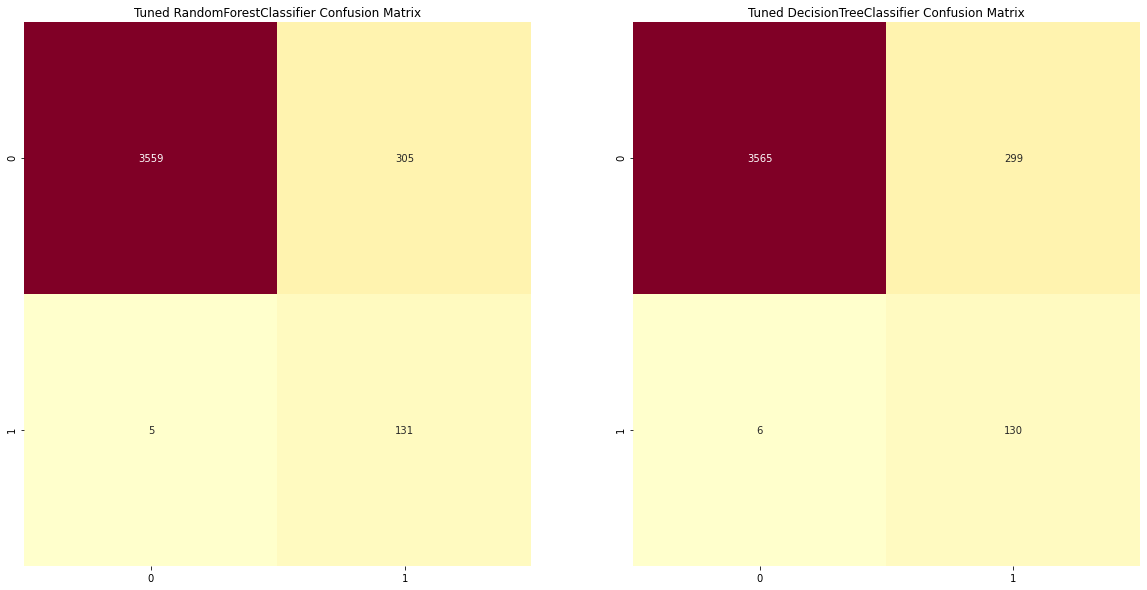

<Figure size 720x720 with 0 Axes>

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
# Confusion Matrix
tree_tuned_cm = confusion_matrix(y_test, tree_y_pred)
d_tree_tuned_cm = confusion_matrix(y_test, d_tree_y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(tree_tuned_cm, annot=True, fmt="", cbar=False, cmap="YlOrRd", ax=ax1)
ax1.set_title("Tuned RandomForestClassifier Confusion Matrix")
sns.heatmap(d_tree_tuned_cm, annot=True, fmt="", cbar=False, cmap="YlOrRd", ax=ax2)
ax2.set_title("Tuned DecisionTreeClassifier Confusion Matrix")
plt.show()


<u><b>Observations</b></u>

We can see that our model is able to predict the machine status with high recall as the FN value is 5 and 6 for RandomForest . However, we can see that for DecisionTreeClassifier, it is able to reduce value of FP at 299 compared to RandomForestClassifier at 305.


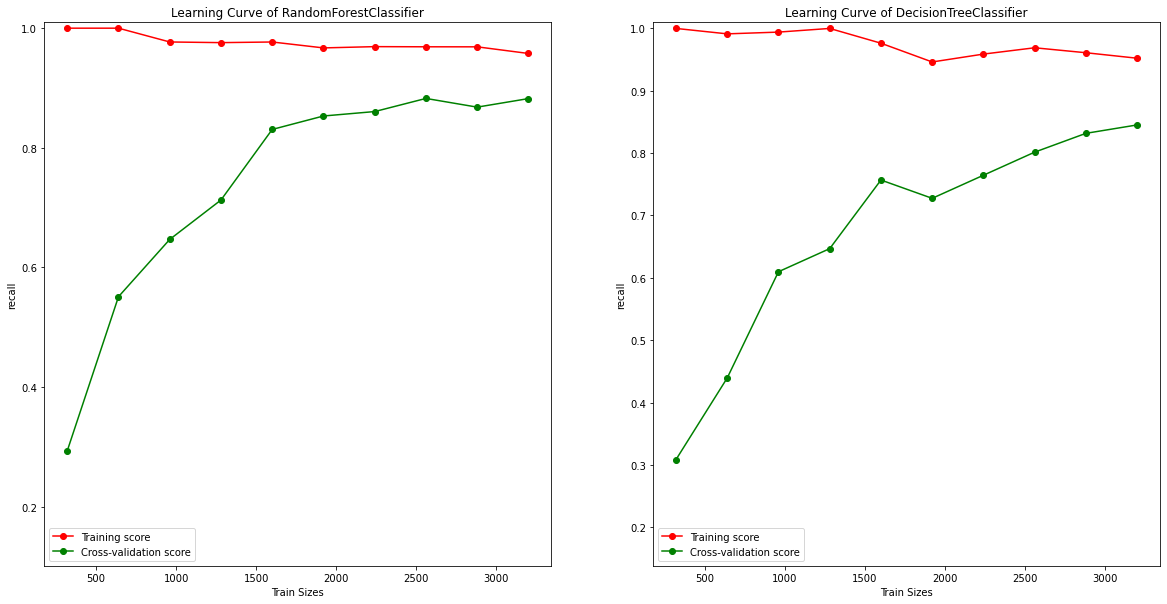

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
plot_learning_curve(tuned_tree_clf, X_test, y_test, scoring="recall", ax=ax1)
plot_learning_curve(tuned_d_tree_clf, X_test, y_test, scoring="recall", ax=ax2)
plt.show()


<u><b>Observations</b></u>




### Saving model

To save, we will be using the pickle library


In [58]:
pickle.dump(tuned_tree_clf, open("random_forest_classifier.p", "wb"))
tuned_tree_clf = pickle.load(open("random_forest_classifier.p", "rb"))


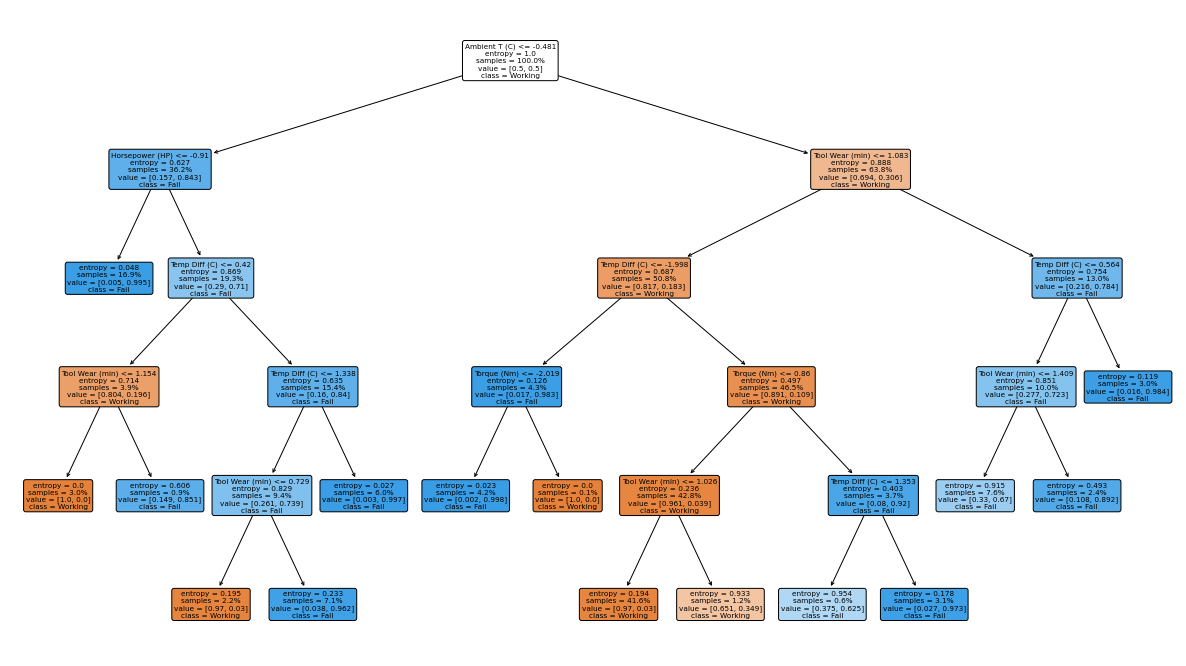

In [59]:
fig, ax = plt.subplots(figsize=(21, 12))
plot_tree(tuned_d_tree_clf[-1], filled=True, ax=ax, feature_names=X_scale_train.columns,
          class_names=["Working", "Fail"],  proportion=True, rounded=True)

plt.show()


# Interpreting the Model - RandomForestClassifier


In [60]:
sub_tree_42 = tuned_tree_clf[-1][42]
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None,
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
    impurity=True,  # enable them if you want
    feature_names=X_scale_train.columns,
    class_names=["Working", "Fail"],
)
print(dot_data)


digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<Temp Diff (C) &le; 0.578<br/>entropy = 1.0<br/>samples = 100.0%<br/>value = [0.499, 0.501]<br/>class = Fail>, fillcolor="#feffff"] ;
1 [label=<Torque (Nm) &le; -2.119<br/>entropy = 0.942<br/>samples = 71.6%<br/>value = [0.641, 0.359]<br/>class = Working>, fillcolor="#f4c8a8"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
3 [label=<Torque (Nm) &le; -2.181<br/>entropy = 0.146<br/>samples = 4.6%<br/>value = [0.021, 0.979]<br/>class = Fail>, fillcolor="#3d9fe6"] ;
1 -> 3 ;
23 [label=<entropy = 0.024<br/>samples = 4.2%<br/>value = [0.002, 0.998]<br/>class = Fail>, fillcolor="#399de5"] ;
3 -> 23 ;
24 [label=<entropy = 0.696<br/>samples = 0.5%<br/>value = [0.188, 0.812]<br/>class = Fail>, fillcolor="#67b4eb"] ;
3 -> 24 ;
4 [label=<Horsepower (HP) &le; -0.928<br/>entropy = 0.9<br/>samples = 67.0%<br/>value = [0.684, 0.316]<br/>class = Working

Using the online GraphViz, a open source graph visualization software, we are able to visualise the RandomForestClassifier

<a href="https://dreampuf.github.io/GraphvizOnline/#digraph%20Tree%20%7B%0D%0Anode%20%5Bshape%3Dbox%2C%20style%3D%22filled%2C%20rounded%22%2C%20color%3D%22black%22%2C%20fontname%3D%22helvetica%22%5D%20%3B%0D%0Aedge%20%5Bfontname%3D%22helvetica%22%5D%20%3B%0D%0A0%20%5Blabel%3D%3CTemp%20Diff%20(C)%20%26le%3B%200.578%3Cbr%2F%3Eentropy%20%3D%201.0%3Cbr%2F%3Esamples%20%3D%20100.0%25%3Cbr%2F%3Evalue%20%3D%20%5B0.499%2C%200.501%5D%3Cbr%2F%3Eclass%20%3D%20Fail%3E%2C%20fillcolor%3D%22%23feffff%22%5D%20%3B%0D%0A1%20%5Blabel%3D%3CTorque%20(Nm)%20%26le%3B%20-2.119%3Cbr%2F%3Eentropy%20%3D%200.942%3Cbr%2F%3Esamples%20%3D%2071.6%25%3Cbr%2F%3Evalue%20%3D%20%5B0.641%2C%200.359%5D%3Cbr%2F%3Eclass%20%3D%20Working%3E%2C%20fillcolor%3D%22%23f4c8a8%22%5D%20%3B%0D%0A0%20-%3E%201%20%5Blabeldistance%3D2.5%2C%20labelangle%3D45%2C%20headlabel%3D%22True%22%5D%20%3B%0D%0A3%20%5Blabel%3D%3CTorque%20(Nm)%20%26le%3B%20-2.181%3Cbr%2F%3Eentropy%20%3D%200.146%3Cbr%2F%3Esamples%20%3D%204.6%25%3Cbr%2F%3Evalue%20%3D%20%5B0.021%2C%200.979%5D%3Cbr%2F%3Eclass%20%3D%20Fail%3E%2C%20fillcolor%3D%22%233d9fe6%22%5D%20%3B%0D%0A1%20-%3E%203%20%3B%0D%0A23%20%5Blabel%3D%3Centropy%20%3D%200.024%3Cbr%2F%3Esamples%20%3D%204.2%25%3Cbr%2F%3Evalue%20%3D%20%5B0.002%2C%200.998%5D%3Cbr%2F%3Eclass%20%3D%20Fail%3E%2C%20fillcolor%3D%22%23399de5%22%5D%20%3B%0D%0A3%20-%3E%2023%20%3B%0D%0A24%20%5Blabel%3D%3Centropy%20%3D%200.696%3Cbr%2F%3Esamples%20%3D%200.5%25%3Cbr%2F%3Evalue%20%3D%20%5B0.188%2C%200.812%5D%3Cbr%2F%3Eclass%20%3D%20Fail%3E%2C%20fillcolor%3D%22%2367b4eb%22%5D%20%3B%0D%0A3%20-%3E%2024%20%3B%0D%0A4%20%5Blabel%3D%3CHorsepower%20(HP)%20%26le%3B%20-0.928%3Cbr%2F%3Eentropy%20%3D%200.9%3Cbr%2F%3Esamples%20%3D%2067.0%25%3Cbr%2F%3Evalue%20%3D%20%5B0.684%2C%200.316%5D%3Cbr%2F%3Eclass%20%3D%20Working%3E%2C%20fillcolor%3D%22%23f1bb95%22%5D%20%3B%0D%0A1%20-%3E%204%20%3B%0D%0A5%20%5Blabel%3D%3CAmbient%20T%20(C)%20%26le%3B%20-0.481%3Cbr%2F%3Eentropy%20%3D%200.774%3Cbr%2F%3Esamples%20%3D%2015.0%25%3Cbr%2F%3Evalue%20%3D%20%5B0.228%2C%200.772%5D%3Cbr%2F%3Eclass%20%3D%20Fail%3E%2C%20fillcolor%3D%22%2373baed%22%5D%20%3B%0D%0A4%20-%3E%205%20%3B%0D%0A7%20%5Blabel%3D%3Centropy%20%3D%200.061%3Cbr%2F%3Esamples%20%3D%2010.4%25%3Cbr%2F%3Evalue%20%3D%20%5B0.007%2C%200.993%5D%3Cbr%2F%3Eclass%20%3D%20Fail%3E%2C%20fillcolor%3D%22%233a9ee5%22%5D%20%3B%0D%0A5%20-%3E%207%20%3B%0D%0A8%20%5Blabel%3D%3CTorque%20(Nm)%20%26le%3B%20-0.994%3Cbr%2F%3Eentropy%20%3D%200.843%3Cbr%2F%3Esamples%20%3D%204.6%25%3Cbr%2F%3Evalue%20%3D%20%5B0.729%2C%200.271%5D%3Cbr%2F%3Eclass%20%3D%20Working%3E%2C%20fillcolor%3D%22%23efb083%22%5D%20%3B%0D%0A5%20-%3E%208%20%3B%0D%0A21%20%5Blabel%3D%3Centropy%20%3D%200.0%3Cbr%2F%3Esamples%20%3D%200.8%25%3Cbr%2F%3Evalue%20%3D%20%5B1.0%2C%200.0%5D%3Cbr%2F%3Eclass%20%3D%20Working%3E%2C%20fillcolor%3D%22%23e58139%22%5D%20%3B%0D%0A8%20-%3E%2021%20%3B%0D%0A22%20%5Blabel%3D%3Centropy%20%3D%200.906%3Cbr%2F%3Esamples%20%3D%203.9%25%3Cbr%2F%3Evalue%20%3D%20%5B0.678%2C%200.322%5D%3Cbr%2F%3Eclass%20%3D%20Working%3E%2C%20fillcolor%3D%22%23f1bd97%22%5D%20%3B%0D%0A8%20-%3E%2022%20%3B%0D%0A6%20%5Blabel%3D%3CHorsepower%20(HP)%20%26le%3B%201.571%3Cbr%2F%3Eentropy%20%3D%200.689%3Cbr%2F%3Esamples%20%3D%2052.0%25%3Cbr%2F%3Evalue%20%3D%20%5B0.816%2C%200.184%5D%3Cbr%2F%3Eclass%20%3D%20Working%3E%2C%20fillcolor%3D%22%23eb9d66%22%5D%20%3B%0D%0A4%20-%3E%206%20%3B%0D%0A17%20%5Blabel%3D%3CTorque%20(Nm)%20%26le%3B%200.077%3Cbr%2F%3Eentropy%20%3D%200.702%3Cbr%2F%3Esamples%20%3D%2050.5%25%3Cbr%2F%3Evalue%20%3D%20%5B0.81%2C%200.19%5D%3Cbr%2F%3Eclass%20%3D%20Working%3E%2C%20fillcolor%3D%22%23eb9f68%22%5D%20%3B%0D%0A6%20-%3E%2017%20%3B%0D%0A19%20%5Blabel%3D%3Centropy%20%3D%200.581%3Cbr%2F%3Esamples%20%3D%2037.7%25%3Cbr%2F%3Evalue%20%3D%20%5B0.861%2C%200.139%5D%3Cbr%2F%3Eclass%20%3D%20Working%3E%2C%20fillcolor%3D%22%23e99559%22%5D%20%3B%0D%0A17%20-%3E%2019%20%3B%0D%0A20%20%5Blabel%3D%3Centropy%20%3D%200.928%3Cbr%2F%3Esamples%20%3D%2012.8%25%3Cbr%2F%3Evalue%20%3D%20%5B0.656%2C%200.344%5D%3Cbr%2F%3Eclass%20%3D%20Working%3E%2C%20fillcolor%3D%22%23f3c3a1%22%5D%20%3B%0D%0A17%20-%3E%2020%20%3B%0D%0A18%20%5Blabel%3D%3Centropy%20%3D%200.0%3Cbr%2F%3Esamples%20%3D%201.6%25%3Cbr%2F%3Evalue%20%3D%20%5B1.0%2C%200.0%5D%3Cbr%2F%3Eclass%20%3D%20Working%3E%2C%20fillcolor%3D%22%23e58139%22%5D%20%3B%0D%0A6%20-%3E%2018%20%3B%0D%0A2%20%5Blabel%3D%3CTemp%20Diff%20(C)%20%26le%3B%201.334%3Cbr%2F%3Eentropy%20%3D%200.577%3Cbr%2F%3Esamples%20%3D%2028.4%25%3Cbr%2F%3Evalue%20%3D%20%5B0.137%2C%200.863%5D%3Cbr%2F%3Eclass%20%3D%20Fail%3E%2C%20fillcolor%3D%22%2359ade9%22%5D%20%3B%0D%0A0%20-%3E%202%20%5Blabeldistance%3D2.5%2C%20labelangle%3D-45%2C%20headlabel%3D%22False%22%5D%20%3B%0D%0A9%20%5Blabel%3D%3CAmbient%20T%20(C)%20%26le%3B%20-0.488%3Cbr%2F%3Eentropy%20%3D%200.752%3Cbr%2F%3Esamples%20%3D%2017.6%25%3Cbr%2F%3Evalue%20%3D%20%5B0.216%2C%200.784%5D%3Cbr%2F%3Eclass%20%3D%20Fail%3E%2C%20fillcolor%3D%22%236fb8ec%22%5D%20%3B%0D%0A2%20-%3E%209%20%3B%0D%0A11%20%5Blabel%3D%3CTemp%20Diff%20(C)%20%26le%3B%200.895%3Cbr%2F%3Eentropy%20%3D%200.564%3Cbr%2F%3Esamples%20%3D%2012.5%25%3Cbr%2F%3Evalue%20%3D%20%5B0.132%2C%200.868%5D%3Cbr%2F%3Eclass%20%3D%20Fail%3E%2C%20fillcolor%3D%22%2357ace9%22%5D%20%3B%0D%0A9%20-%3E%2011%20%3B%0D%0A25%20%5Blabel%3D%3Centropy%20%3D%200.694%3Cbr%2F%3Esamples%20%3D%206.2%25%3Cbr%2F%3Evalue%20%3D%20%5B0.187%2C%200.813%5D%3Cbr%2F%3Eclass%20%3D%20Fail%3E%2C%20fillcolor%3D%22%2366b3eb%22%5D%20%3B%0D%0A11%20-%3E%2025%20%3B%0D%0A26%20%5Blabel%3D%3Centropy%20%3D%200.403%3Cbr%2F%3Esamples%20%3D%206.4%25%3Cbr%2F%3Evalue%20%3D%20%5B0.08%2C%200.92%5D%3Cbr%2F%3Eclass%20%3D%20Fail%3E%2C%20fillcolor%3D%22%234aa6e7%22%5D%20%3B%0D%0A11%20-%3E%2026%20%3B%0D%0A12%20%5Blabel%3D%3CTool%20Wear%20(min)%20%26le%3B%200.913%3Cbr%2F%3Eentropy%20%3D%200.982%3Cbr%2F%3Esamples%20%3D%205.0%25%3Cbr%2F%3Evalue%20%3D%20%5B0.421%2C%200.579%5D%3Cbr%2F%3Eclass%20%3D%20Fail%3E%2C%20fillcolor%3D%22%23c9e4f8%22%5D%20%3B%0D%0A9%20-%3E%2012%20%3B%0D%0A13%20%5Blabel%3D%3CAmbient%20T%20(C)%20%26le%3B%200.055%3Cbr%2F%3Eentropy%20%3D%200.46%3Cbr%2F%3Esamples%20%3D%202.2%25%3Cbr%2F%3Evalue%20%3D%20%5B0.903%2C%200.097%5D%3Cbr%2F%3Eclass%20%3D%20Working%3E%2C%20fillcolor%3D%22%23e88f4e%22%5D%20%3B%0D%0A12%20-%3E%2013%20%3B%0D%0A15%20%5Blabel%3D%3Centropy%20%3D%200.0%3Cbr%2F%3Esamples%20%3D%201.8%25%3Cbr%2F%3Evalue%20%3D%20%5B1.0%2C%200.0%5D%3Cbr%2F%3Eclass%20%3D%20Working%3E%2C%20fillcolor%3D%22%23e58139%22%5D%20%3B%0D%0A13%20-%3E%2015%20%3B%0D%0A16%20%5Blabel%3D%3Centropy%20%3D%200.986%3Cbr%2F%3Esamples%20%3D%200.4%25%3Cbr%2F%3Evalue%20%3D%20%5B0.431%2C%200.569%5D%3Cbr%2F%3Eclass%20%3D%20Fail%3E%2C%20fillcolor%3D%22%23cfe7f9%22%5D%20%3B%0D%0A13%20-%3E%2016%20%3B%0D%0A14%20%5Blabel%3D%3Centropy%20%3D%200.268%3Cbr%2F%3Esamples%20%3D%202.9%25%3Cbr%2F%3Evalue%20%3D%20%5B0.046%2C%200.954%5D%3Cbr%2F%3Eclass%20%3D%20Fail%3E%2C%20fillcolor%3D%22%2342a2e6%22%5D%20%3B%0D%0A12%20-%3E%2014%20%3B%0D%0A10%20%5Blabel%3D%3Centropy%20%3D%200.082%3Cbr%2F%3Esamples%20%3D%2010.8%25%3Cbr%2F%3Evalue%20%3D%20%5B0.01%2C%200.99%5D%3Cbr%2F%3Eclass%20%3D%20Fail%3E%2C%20fillcolor%3D%22%233b9ee5%22%5D%20%3B%0D%0A2%20-%3E%2010%20%3B%0D%0A%7D%0D%0A">Click here to view the visualization</a>

<center><img src="https://media.discordapp.net/attachments/910885868733087747/979926910756855828/graphviz_4.png?width=1366&height=671"></center>


**Observations**

- Ambient T (C) is one of the main feature as it is able to split at the root into machine that fail and work as it is able to separate 0.704 and 0.839 samples of fail and working
- Tool Wear (min) is one of the important feature at is able to split between machine failure and machine working


### Features Importance


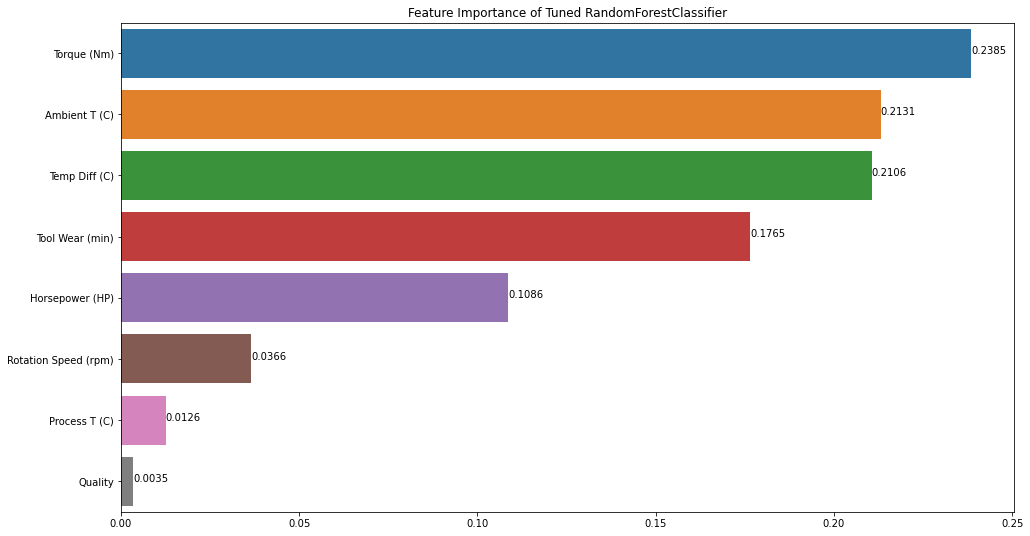

In [61]:
importance = pd.Series(
    tuned_tree_clf[-1].feature_importances_, index=X_scale_train.columns
).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(
    x=importance[importance > 0].values, y=importance[importance > 0].index, ax=ax
)
ax.set_title("Feature Importance of Tuned {}".format("RandomForestClassifier"))
[
    ax.text(x=v, y=i, s=round(v, 4))
    for i, v in zip(np.arange(0, len(importance)), importance[importance > 0].values)
]
plt.show()


**Observations**

Torque (Nm), Tool Wear (min) and Temp Diff (C) is one of the important features for our model.


# Summary

We have successfully created a model that is able to predict if the machine has failed. Through extensive feature engineering, we have been able to develop a simple model that is able to predict if the machine has failed. However, the model still faces some limitations. It has only been trained and tested on synthetically generated data, there are other factors that affects machine status like power overload from electricity. For the model to be fully deployed, it is necessary to collect more data and test it on real life examples.


---

# Personal Learning Reflection

The difficulty I found doing the prediction task was being able to implement a pipeline for individual columns. This allowed me to learn about sci-kit learn transformers. In terms of Feature Engineering, I learn that knowing the context of the dataset is super important and allows us to do feature engineering easily.
